# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
sns.set()

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

periodo       fecha  hora_fin     dia    sentido tipo_vehiculo  \
80      2019  2019-01-01         2  Martes     Centro       Liviano   
86      2019  2019-01-01         2  Martes     Centro        Pesado   
88      2019  2019-01-01         2  Martes  Provincia       Liviano   
94      2019  2019-01-01         2  Martes  Provincia        Pesado   
149     2019  2019-01-01         3  Martes     Centro       Liviano   

     cantidad_pasos  
80              537  
86                1  
88              443  
94                1  
149             769

In [11]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

periodo     dia    sentido tipo_vehiculo  cantidad_pasos  \
80      2019  Martes     Centro       Liviano             537   
86      2019  Martes     Centro        Pesado               1   
88      2019  Martes  Provincia       Liviano             443   
94      2019  Martes  Provincia        Pesado               1   
149     2019  Martes     Centro       Liviano             769   

                 fecha2  
80  2019-01-01 02:00:00  
86  2019-01-01 02:00:00  
88  2019-01-01 02:00:00  
94  2019-01-01 02:00:00  
149 2019-01-01 03:00:00

In [12]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

periodo     dia    sentido tipo_vehiculo  cantidad_pasos  \
80      2019  Martes     Centro       Liviano             537   
86      2019  Martes     Centro        Pesado               1   
88      2019  Martes  Provincia       Liviano             443   
94      2019  Martes  Provincia        Pesado               1   
149     2019  Martes     Centro       Liviano             769   

                  fecha  
80  2019-01-01 02:00:00  
86  2019-01-01 02:00:00  
88  2019-01-01 02:00:00  
94  2019-01-01 02:00:00  
149 2019-01-01 03:00:00

In [13]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

periodo      dia    sentido tipo_vehiculo  cantidad_pasos  \
0          2017  Domingo  Provincia        Pesado               1   
1          2017  Domingo  Provincia       Liviano               9   
2          2017  Domingo  Provincia       Liviano             644   
3          2017  Domingo  Provincia        Pesado               6   
4          2017  Domingo  Provincia        Pesado               1   
...         ...      ...        ...           ...             ...   
238864     2019   Martes  Provincia       Liviano             556   
238865     2019   Martes  Provincia        Pesado               1   
238866     2019   Martes     Centro       Liviano             580   
238867     2019   Martes     Centro       Liviano             214   
238868     2019   Martes  Provincia       Liviano             190   

                     fecha  
0      2017-01-01 00:00:00  
1      2017-01-01 00:00:00  
2      2017-01-01 00:00:00  
3      2017-01-01 00:00:00  
4      2017-01-01 00:00:00  
...                    ...  
238864 2019-12-31 22:00:00  
238865 2019-12-31 22:00:00  
238866 2019-12-31 22:00:00  
238867 2019-12-31 23:00:00  
238868 2019-12-31 23:00:00  

[238869 rows x 6 columns]

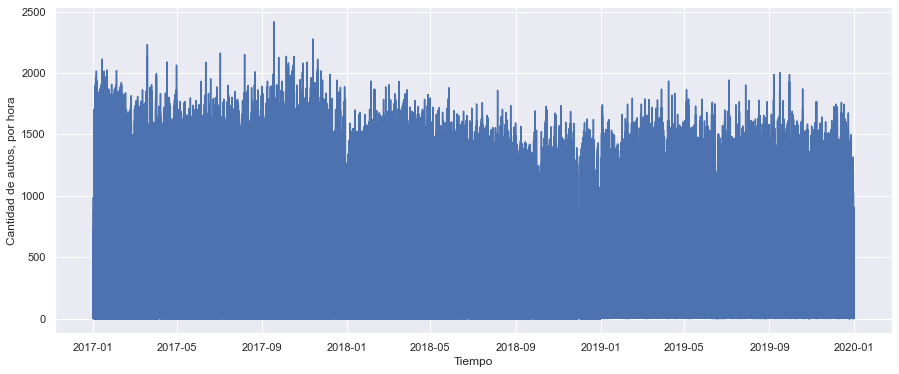

In [14]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [15]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum().astype("float64")
print(diario.shape)
diario

(1095, 2)


periodo  cantidad_pasos
fecha                               
2017-01-01  465927.0         31183.0
2017-01-02  637372.0         51568.0
2017-01-03  619219.0         51093.0
2017-01-04  647457.0         53332.0
2017-01-05  641406.0         56486.0
...              ...             ...
2019-12-27  193824.0         40182.0
2019-12-28  193824.0         30681.0
2019-12-29  193824.0         26259.0
2019-12-30  191805.0         34523.0
2019-12-31  179691.0         21447.0

[1095 rows x 2 columns]

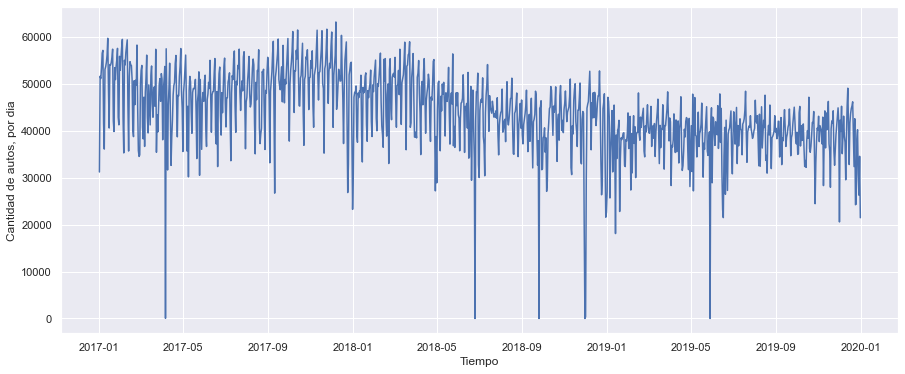

In [16]:
# Con media movil.
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)

plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

## **Analisis Exploratorio de Datos.**
_Comenzaremos el siguiente proyecto 3 con un EDA, a fines de ver como esta compuesto nuestro data set_

In [17]:
# Visualizamos como estan compuestos los dataset con los que vamos a trabajar
dataset

periodo      dia    sentido tipo_vehiculo  cantidad_pasos  \
0          2017  Domingo  Provincia        Pesado               1   
1          2017  Domingo  Provincia       Liviano               9   
2          2017  Domingo  Provincia       Liviano             644   
3          2017  Domingo  Provincia        Pesado               6   
4          2017  Domingo  Provincia        Pesado               1   
...         ...      ...        ...           ...             ...   
238864     2019   Martes  Provincia       Liviano             556   
238865     2019   Martes  Provincia        Pesado               1   
238866     2019   Martes     Centro       Liviano             580   
238867     2019   Martes     Centro       Liviano             214   
238868     2019   Martes  Provincia       Liviano             190   

                     fecha  
0      2017-01-01 00:00:00  
1      2017-01-01 00:00:00  
2      2017-01-01 00:00:00  
3      2017-01-01 00:00:00  
4      2017-01-01 00:00:00  
...                    ...  
238864 2019-12-31 22:00:00  
238865 2019-12-31 22:00:00  
238866 2019-12-31 22:00:00  
238867 2019-12-31 23:00:00  
238868 2019-12-31 23:00:00  

[238869 rows x 6 columns]

### Día
_Análisis correspondiente al feature "Día"_

<Figure size 1440x1224 with 0 Axes>

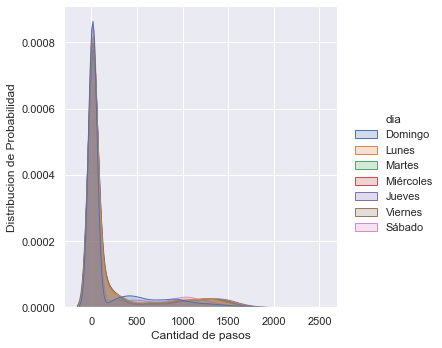

In [18]:
# Distribucion de probabilidad de la cantidad de pases con respecto a los dias de la semana.
plt.figure(figsize = (20,17))
sns.displot(dataset, x="cantidad_pasos", hue="dia", kind="kde", fill=True)

plt.xlabel("Cantidad de pasos")
plt.ylabel("Distribucion de Probabilidad")
plt.show()

<Figure size 1440x1224 with 0 Axes>

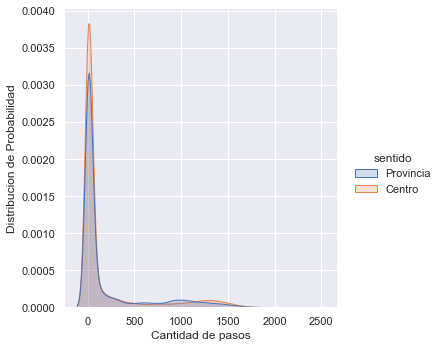

In [19]:
# Distribucion de probabilidad de la cantidad de pases con respecto al sentido de donde entran y salen autos.
plt.figure(figsize = (20,17))
sns.displot(dataset, x="cantidad_pasos", hue="sentido", kind="kde", fill=True)

plt.xlabel("Cantidad de pasos")
plt.ylabel("Distribucion de Probabilidad")
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


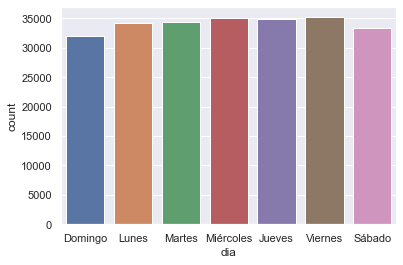

In [20]:
# esta grafica no nos dice mucho pero a primera vista podemos notar que no hay dias en que no circule un volumen considerable de autos.
sns.countplot(dataset.dia)
plt.show()

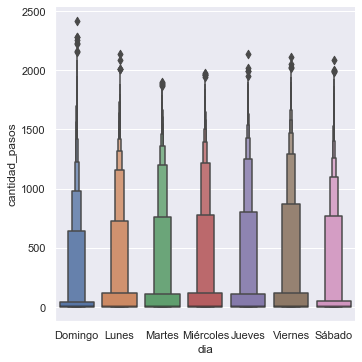

In [21]:
# En esta sí podemos apreciar que volumen de vehiculos se mueven por ese peaje. 
sns.catplot(x="dia",y="cantidad_pasos",kind="boxen",data=dataset)
plt.show()

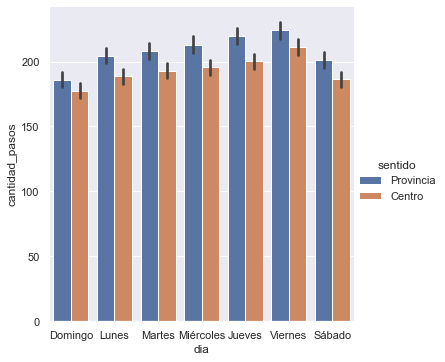

In [22]:
# a partir del grafico de arriba, notamos que para sentido provincia, el viernes vuelve a ser el dia con mas salidas (y entradas)
# es muy parejo, logicamente los sabado y domingos es donde menos cantidad de autos circulan.
sns.catplot(x="dia",y="cantidad_pasos",hue="sentido",kind="bar",data=dataset)
plt.show()

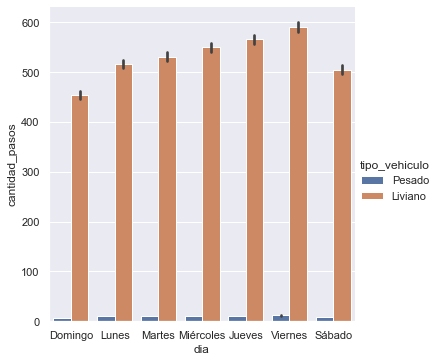

In [23]:
# vemos que interesante es como asciende el volumen de vehiculos liviamos que pasan por la ciudad de lunes a viernes, y 
# claramente para el fin de semana disminuye considerablemente, siendo superiores los pasos de vehiculos livianos.
sns.catplot(x="dia",y="cantidad_pasos",hue="tipo_vehiculo",kind="bar",data=dataset);
plt.show()

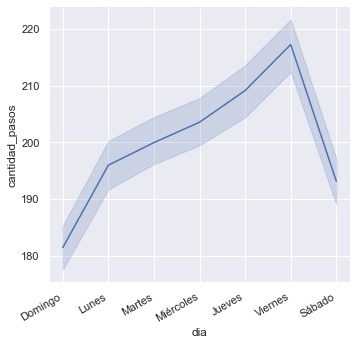

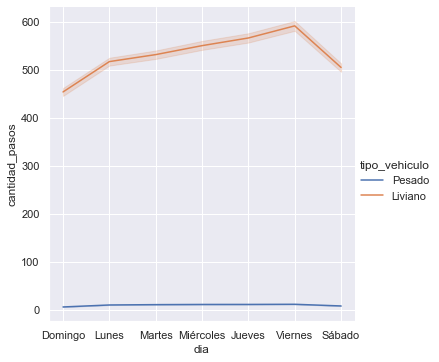

In [24]:
# vimos que efectivamente el viernes es el que mas se transita. Pero la linea muestra mucha sombra de variabilidad, por lo tanto
# separaremos entre tipo de vehiculos para visualizar de mejor manera. Vemos que el comportamiento del primer grafico es mas
# significativo para los V. livianos, no asi los pesados.
g = sns.relplot(x="dia", y="cantidad_pasos", kind="line", data=dataset)
g.fig.autofmt_xdate()

sns.relplot(x="dia", y="cantidad_pasos", hue="tipo_vehiculo", kind="line", data=dataset);

### Comparaciones 
_En este apartado, veremos que información podemos encontrar de utilidad en los demas features_

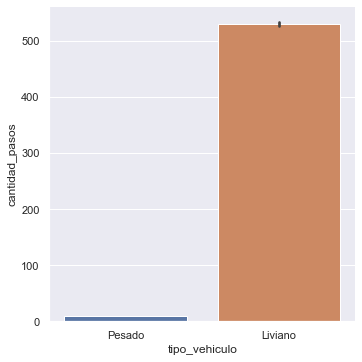

In [25]:
# Esto quiza lo mas obvio para una ciudad como Buenos Aires, lo vehiculos mas representativos son los livianos.
sns.catplot(x="tipo_vehiculo",y="cantidad_pasos",kind="bar",data=dataset);
plt.show()

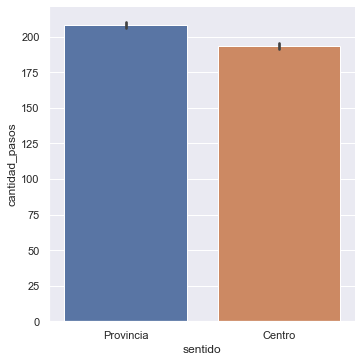

In [26]:
# Notamos que para toda la serie, las salidas o las idas a provincia son mas significativas que las entradas al centro. Po-
# -dría ser a lo mejor por optar por otros atajos o medios para ir a la ciudad o en otras formas de pago.
sns.catplot(x="sentido",y="cantidad_pasos",kind="bar",data=dataset);
plt.show()

### **Análisis de Componentes**
_Tendencias, medias moviles y Estacionalidad por año._

In [27]:
# partimos el dataset en tres por año para hacer una mejor comparacion de datos.
df_2019 = dataset[dataset.periodo == 2019]
df_2018 = dataset[dataset.periodo == 2018]
df_2017 = dataset[dataset.periodo == 2017]

In [28]:
df_2019

periodo     dia    sentido tipo_vehiculo  cantidad_pasos  \
204226     2019  Martes     Centro       Liviano             644   
204227     2019  Martes     Centro        Pesado               3   
204228     2019  Martes  Provincia       Liviano             630   
204229     2019  Martes  Provincia        Pesado               9   
204230     2019  Martes     Centro        Pesado               1   
...         ...     ...        ...           ...             ...   
238864     2019  Martes  Provincia       Liviano             556   
238865     2019  Martes  Provincia        Pesado               1   
238866     2019  Martes     Centro       Liviano             580   
238867     2019  Martes     Centro       Liviano             214   
238868     2019  Martes  Provincia       Liviano             190   

                     fecha  
204226 2019-01-01 00:00:00  
204227 2019-01-01 00:00:00  
204228 2019-01-01 00:00:00  
204229 2019-01-01 00:00:00  
204230 2019-01-01 02:00:00  
...                    ...  
238864 2019-12-31 22:00:00  
238865 2019-12-31 22:00:00  
238866 2019-12-31 22:00:00  
238867 2019-12-31 23:00:00  
238868 2019-12-31 23:00:00  

[34643 rows x 6 columns]

In [29]:
df_2018

periodo    dia    sentido tipo_vehiculo  cantidad_pasos  \
104230     2018  Lunes  Provincia        Pesado               8   
104231     2018  Lunes     Centro       Liviano             919   
104232     2018  Lunes  Provincia        Pesado               1   
104233     2018  Lunes  Provincia       Liviano             647   
104234     2018  Lunes  Provincia       Liviano              14   
...         ...    ...        ...           ...             ...   
204221     2018  Lunes  Provincia       Liviano              11   
204222     2018  Lunes  Provincia       Liviano             203   
204223     2018  Lunes     Centro       Liviano             239   
204224     2018  Lunes     Centro        Pesado               1   
204225     2018  Lunes     Centro       Liviano               7   

                     fecha  
104230 2018-01-01 00:00:00  
104231 2018-01-01 00:00:00  
104232 2018-01-01 00:00:00  
104233 2018-01-01 00:00:00  
104234 2018-01-01 00:00:00  
...                    ...  
204221 2018-12-31 23:00:00  
204222 2018-12-31 23:00:00  
204223 2018-12-31 23:00:00  
204224 2018-12-31 23:00:00  
204225 2018-12-31 23:00:00  

[99996 rows x 6 columns]

In [30]:
df_2017

periodo      dia    sentido tipo_vehiculo  cantidad_pasos  \
0          2017  Domingo  Provincia        Pesado               1   
1          2017  Domingo  Provincia       Liviano               9   
2          2017  Domingo  Provincia       Liviano             644   
3          2017  Domingo  Provincia        Pesado               6   
4          2017  Domingo  Provincia        Pesado               1   
...         ...      ...        ...           ...             ...   
104225     2017  Domingo  Provincia       Liviano               8   
104226     2017  Domingo     Centro        Pesado               1   
104227     2017  Domingo     Centro        Pesado               1   
104228     2017  Domingo     Centro       Liviano             151   
104229     2017  Domingo     Centro       Liviano               8   

                     fecha  
0      2017-01-01 00:00:00  
1      2017-01-01 00:00:00  
2      2017-01-01 00:00:00  
3      2017-01-01 00:00:00  
4      2017-01-01 00:00:00  
...                    ...  
104225 2017-12-31 23:00:00  
104226 2017-12-31 23:00:00  
104227 2017-12-31 23:00:00  
104228 2017-12-31 23:00:00  
104229 2017-12-31 23:00:00  

[104230 rows x 6 columns]

##### Resampleos

In [31]:
# importamos de la libreria de scikit learn un modelo de regresion para poder mostrar la tendencia de cada serie
from sklearn.linear_model import LinearRegression

###### 2019

In [32]:
# a modo de practica, se resamplea la serie de datos para cada año al igual que como lo hicimos al principio.
diario_2019 = df_2019.resample('D', on = 'fecha').sum()
diario_2019["df_2019"] = diario_2019.cantidad_pasos.rolling(12).mean()
diario_2019["fecha_numeros"]=diario_2019.index.map(datetime.datetime.toordinal)
diario_2019.head()

diario_2019

periodo  cantidad_pasos       df_2019  fecha_numeros
fecha                                                           
2019-01-01   179691           27038           NaN         737060
2019-01-02   193824           47080           NaN         737061
2019-01-03   193824           46194           NaN         737062
2019-01-04   193824           42887           NaN         737063
2019-01-05   191805           25650           NaN         737064
...             ...             ...           ...            ...
2019-12-27   193824           40182  38527.583333         737420
2019-12-28   193824           30681  37618.666667         737421
2019-12-29   193824           26259  36173.833333         737422
2019-12-30   191805           34523  35326.833333         737423
2019-12-31   179691           21447  33344.000000         737424

[365 rows x 4 columns]

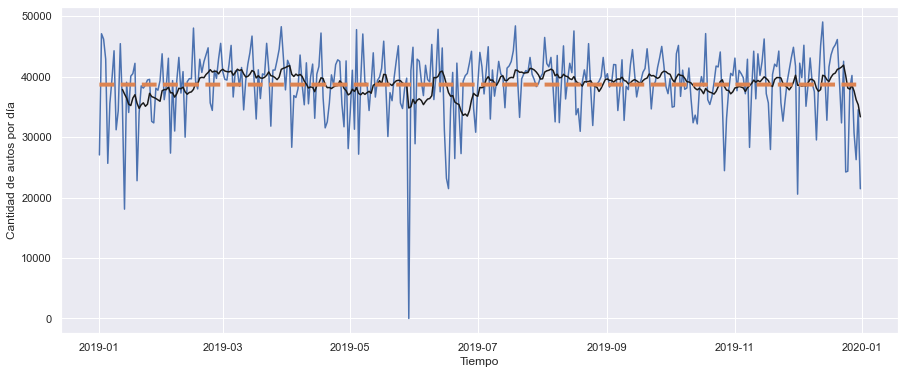

In [33]:
# 2019 con media movil y Tendencia.
lr = LinearRegression()
lr.fit(diario_2019.fecha_numeros.values.reshape(-1, 1), diario_2019.cantidad_pasos)

plt.figure(figsize = (15,6))
plt.plot(diario_2019.index, diario_2019.cantidad_pasos)
plt.plot(diario_2019.df_2019,c="k",ls="solid",lw=1.5)
plt.plot(diario_2019.index, lr.predict(diario_2019.fecha_numeros.values.reshape(-1, 1)), lw = 4,ls = "--")

plt.xlabel("Tiempo")
plt.ylabel("Cantidad de autos por día")
plt.show()

###### 2018

In [34]:
# 2018 con media movil y Tendencia.
diario_2018 = df_2018.resample('D', on = 'fecha').sum()
diario_2018["df_2018"] = diario_2018.cantidad_pasos.rolling(12).mean()
diario_2018["fecha_numeros"]=diario_2018.index.map(datetime.datetime.toordinal)
diario_2018.head()

diario_2018

periodo  cantidad_pasos       df_2018  fecha_numeros
fecha                                                           
2018-01-01   401582           30735           NaN         736695
2018-01-02   567058           47130           NaN         736696
2018-01-03   552932           48162           NaN         736697
2018-01-04   526698           47953           NaN         736698
2018-01-05   552932           49505           NaN         736699
...             ...             ...           ...            ...
2018-12-27   567058           45929  41827.333333         737055
2018-12-28   591274           47832  42390.666667         737056
2018-12-29   522662           35446  41755.666667         737057
2018-12-30   312790           21559  39733.250000         737058
2018-12-31   399564           22599  37664.583333         737059

[365 rows x 4 columns]

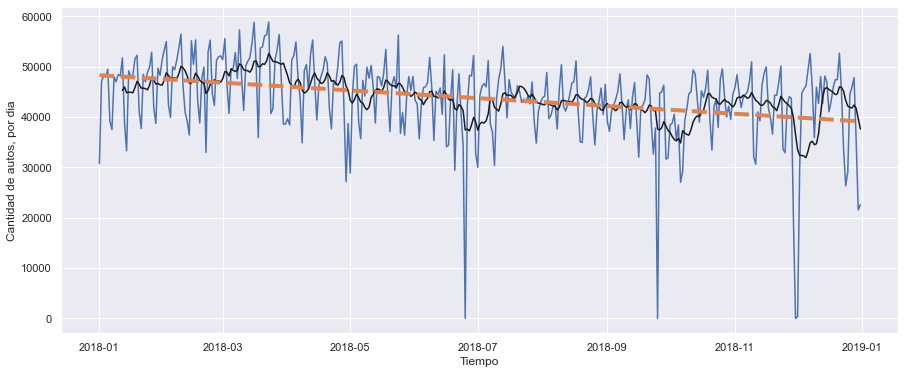

In [35]:
lr = LinearRegression()
lr.fit(diario_2018.fecha_numeros.values.reshape(-1, 1), diario_2018.cantidad_pasos)

plt.figure(figsize = (15,6))
plt.plot(diario_2018.index, diario_2018.cantidad_pasos)
plt.plot(diario_2018.df_2018,c="k",ls="solid",lw=1.5)
plt.plot(diario_2018.index, lr.predict(diario_2018.fecha_numeros.values.reshape(-1, 1)), lw = 4,ls = "--")

plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

###### 2017

In [36]:
# 2018 con media movil y Tendencia.
diario_2017 = df_2017.resample('D', on = 'fecha').sum()
diario_2017["df_2017"] = diario_2017.cantidad_pasos.rolling(12).mean().dropna()
diario_2017["fecha_numeros"]=diario_2017.index.map(datetime.datetime.toordinal)
diario_2017.head()

diario_2017

periodo  cantidad_pasos       df_2017  fecha_numeros
fecha                                                           
2017-01-01   465927           31183           NaN         736330
2017-01-02   637372           51568           NaN         736331
2017-01-03   619219           51093           NaN         736332
2017-01-04   647457           53332           NaN         736333
2017-01-05   641406           56486           NaN         736334
...             ...             ...           ...            ...
2017-12-27   592998           52909  47013.500000         736690
2017-12-28   580896           54312  47173.500000         736691
2017-12-29   607117           54556  47841.333333         736692
2017-12-30   542573           39969  48068.750000         736693
2017-12-31   403400           23229  45920.833333         736694

[365 rows x 4 columns]

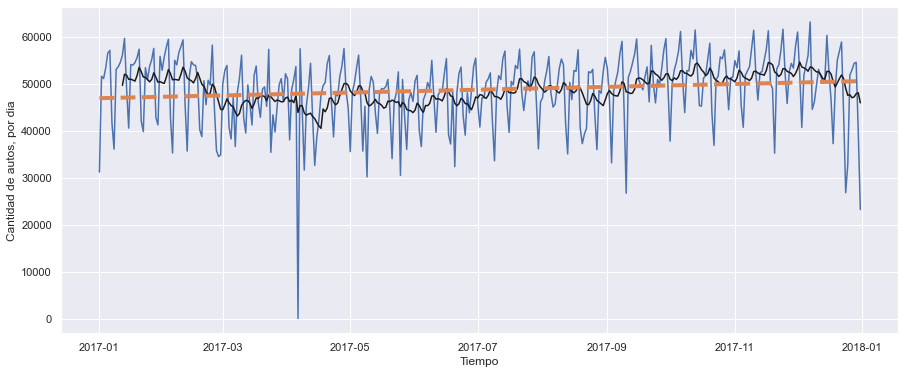

In [37]:
lr = LinearRegression()
lr.fit(diario_2017.fecha_numeros.values.reshape(-1, 1), diario_2017.cantidad_pasos)

plt.figure(figsize = (15,6))
plt.plot(diario_2017.index, diario_2017.cantidad_pasos)
plt.plot(diario_2017.df_2017,c="k",ls="solid",lw=1.5)
plt.plot(diario_2017.index, lr.predict(diario_2017.fecha_numeros.values.reshape(-1, 1)), lw = 4,ls = "--")

plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

###### Comparando las series.

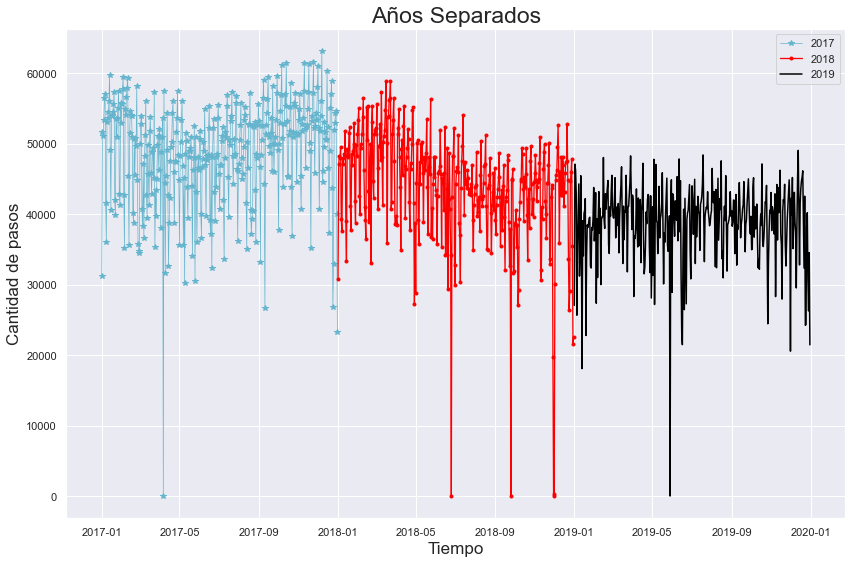

In [38]:
plt.figure(figsize=(12,8))
plt.plot(diario_2017.index, diario_2017.cantidad_pasos,marker='*', linestyle='-', linewidth=0.7, label='2017', color='c')
plt.plot(diario_2018.index, diario_2018.cantidad_pasos, marker='.', linestyle='-', linewidth=1.3, label='2018', color='red')
plt.plot(diario_2019.index, diario_2019.cantidad_pasos,linestyle="-",linewidth=1.5,label="2019",color="black")
plt.xlabel('Tiempo', size= 17)
plt.ylabel('Cantidad de pasos', size= 17)
plt.title('Años Separados', size= 23)
plt.legend()
plt.tight_layout()
plt.show()

#### Anexo: 

###### Mes

In [39]:
#2019
horario_19 = df_2019.sort_values("fecha",ascending=True)
horario_19.set_index("fecha",inplace=True)

tabla_19 = horario_19["cantidad_pasos"].resample("M").max().to_frame()
tabla_19["first"]= horario_19["cantidad_pasos"].resample("M").first().to_frame()
tabla_19["last"]= horario_19["cantidad_pasos"].resample("M").last().to_frame()

tabla_19.columns=["Maximo de vehiculos","Primer día","Ultimo Dia"]

tabla_19.round(2)

Maximo de vehiculos  Primer día  Ultimo Dia
fecha                                                  
2019-01-31                 1742         644         575
2019-02-28                 1795          13         498
2019-03-31                 1869          11         732
2019-04-30                 1934           4           6
2019-05-31                 1865           7         673
2019-06-30                 1763           5         522
2019-07-31                 1943           4           5
2019-08-31                 1779           5         773
2019-09-30                 2004           7           8
2019-10-31                 1871           9           6
2019-11-30                 1768         486           6
2019-12-31                 1761         463         190

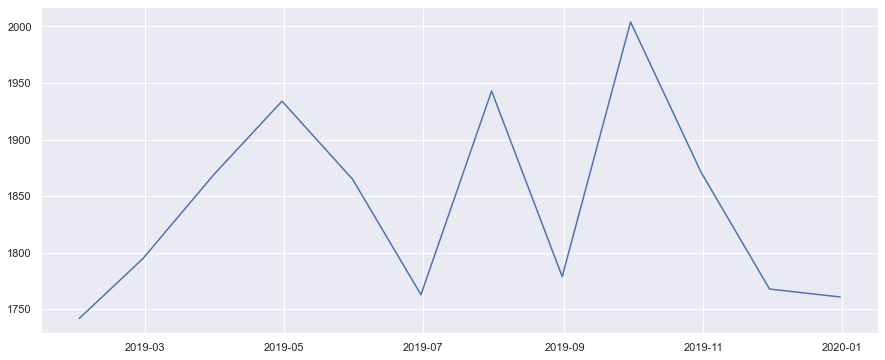

In [40]:
# Para 2019, el mayor volumen de vehiculos fue para el mes de Octubre.
plt.figure(figsize = (15,6))
plt.plot(tabla_19.index,tabla_19["Maximo de vehiculos"])

In [41]:
# 2018
horario_18 = df_2018.sort_values("fecha",ascending=True)
horario_18.set_index("fecha",inplace=True)

tabla_18 = horario_18["cantidad_pasos"].resample("M").max().to_frame()
tabla_18["first"]= horario_18["cantidad_pasos"].resample("M").first().to_frame()
tabla_18["last"]= horario_18["cantidad_pasos"].resample("M").last().to_frame()

tabla_18.columns=["Maximo de vehiculos","Primer día","Ultimo Dia"]

tabla_18.round(2).head()

Maximo de vehiculos  Primer día  Ultimo Dia
fecha                                                  
2018-01-31                 1697           8          14
2018-02-28                 1935           1          38
2018-03-31                 1930           9         742
2018-04-30                 1825         669          23
2018-05-31                 1880           1           2

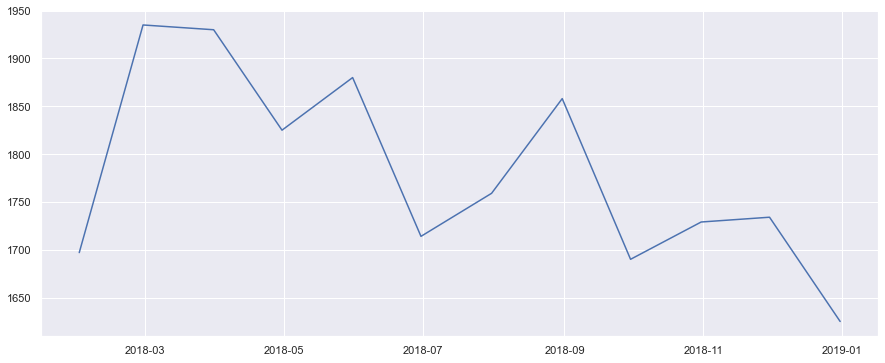

In [42]:
# En 2018 se ve como disminuye significativamente el transito, siendo los primeros meses del año en los que mas se 
# circulo pero luego fue disminuyendo.
plt.figure(figsize = (15,6))
plt.plot(tabla_18.index,tabla_18["Maximo de vehiculos"])

In [43]:
# 2017.
horario_17 = df_2017.sort_values("fecha",ascending=True)
horario_17.set_index("fecha",inplace=True)

tabla_17 = horario_17["cantidad_pasos"].resample("M").max().to_frame()
tabla_17["first"]= horario_17["cantidad_pasos"].resample("M").first().to_frame()
tabla_17["last"]= horario_17["cantidad_pasos"].resample("M").last().to_frame()

tabla_17.columns=["Maximo de vehiculos","Primer día","Ultimo Dia"]

tabla_17.round(2).head()

Maximo de vehiculos  Primer día  Ultimo Dia
fecha                                                  
2017-01-31                 2112           1           1
2017-02-28                 2020         411           1
2017-03-31                 2230          16           7
2017-04-30                 2090           1         870
2017-05-31                 1797           2         646

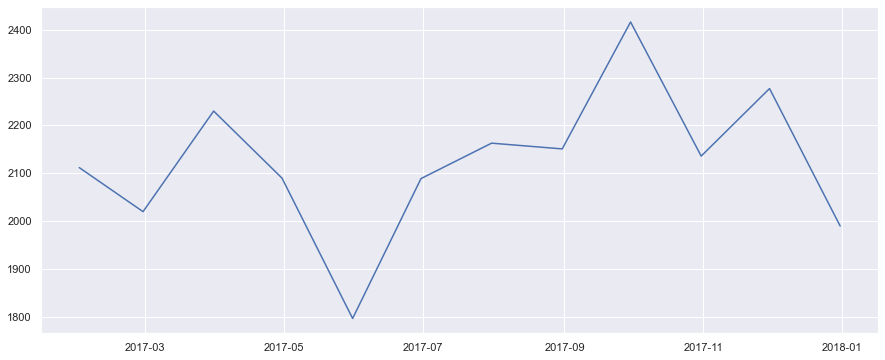

In [44]:
# siendo el año con mas transito y al igual que 2019, el mes con mas volumen de circulacion de vehiculos fue en octubre.
# ¿Puede considerarse un comportamiento estacionario? Mas adelante en el proyecto lo veremos.
plt.figure(figsize = (15,6))
plt.plot(tabla_17.index,tabla_17["Maximo de vehiculos"])

In [45]:
# Creamos la variable tiempo que almacene el dataset original copiado para que no haya error ni omisiones en nuestro 
# posterior analisis.
tiempo = dataset.copy()
tiempo = tiempo.sort_values("fecha",ascending=True)
tiempo.set_index("fecha",inplace=True)
tiempo

periodo      dia    sentido tipo_vehiculo  cantidad_pasos
fecha                                                                         
2017-01-01 00:00:00     2017  Domingo  Provincia        Pesado               1
2017-01-01 00:00:00     2017  Domingo  Provincia       Liviano               9
2017-01-01 00:00:00     2017  Domingo  Provincia       Liviano             644
2017-01-01 00:00:00     2017  Domingo  Provincia        Pesado               6
2017-01-01 00:00:00     2017  Domingo  Provincia        Pesado               1
...                      ...      ...        ...           ...             ...
2019-12-31 22:00:00     2019   Martes  Provincia        Pesado               1
2019-12-31 22:00:00     2019   Martes     Centro        Pesado               2
2019-12-31 22:00:00     2019   Martes     Centro       Liviano             580
2019-12-31 23:00:00     2019   Martes     Centro       Liviano             214
2019-12-31 23:00:00     2019   Martes  Provincia       Liviano             190

[238869 rows x 5 columns]

In [46]:
# Ahora resampleamos la serie copiada tiempo con respecto al mes, imprimimos la media, los minimos y maximos por mes para
# toda la serie.
tabla0 = tiempo["cantidad_pasos"].resample("M").mean().to_frame().dropna()
tabla0["min"] = tiempo["cantidad_pasos"].resample("M").min().to_frame().dropna()
tabla0["max"] = tiempo["cantidad_pasos"].resample("M").max().to_frame().dropna()

tabla0.columns = ["Promedio","Mínimo","Máximo"]
tabla0

Promedio  Mínimo  Máximo
fecha                                 
2017-01-31  162.590631       1    2112
2017-02-28  158.464659       1    2020
2017-03-31  158.481380       1    2230
2017-04-30  162.467187       1    2090
2017-05-31  158.675688       1    1797
2017-06-30  163.927374       1    2089
2017-07-31  168.951096       1    2163
2017-08-31  177.077489       1    2151
2017-09-30  182.260917       1    2416
2017-10-31  186.563420       1    2136
2017-11-30  191.618563       1    2277
2017-12-31  179.935770       1    1990
2018-01-31  166.354669       1    1697
2018-02-28  169.913209       1    1935
2018-03-31  175.035670       1    1930
2018-04-30  168.338745       1    1825
2018-05-31  163.391213       1    1880
2018-06-30  152.863318       1    1714
2018-07-31  155.176030       1    1759
2018-08-31  156.672966       1    1858
2018-09-30  142.563284       1    1690
2018-10-31  152.304353       1    1729
2018-11-30  155.355508       1    1734
2018-12-31  157.584202       1    1625
2019-01-31  394.417874       1    1742
2019-02-28  415.318524       1    1795
2019-03-31  426.524213       1    1869
2019-04-30  399.136427       1    1934
2019-05-31  406.422662       1    1865
2019-06-30  389.842822       1    1763
2019-07-31  421.161943       1    1943
2019-08-31  413.370483       1    1779
2019-09-30  417.482867       1    2004
2019-10-31  397.450894       1    1871
2019-11-30  413.314724       1    1768
2019-12-31  394.939986       1    1761

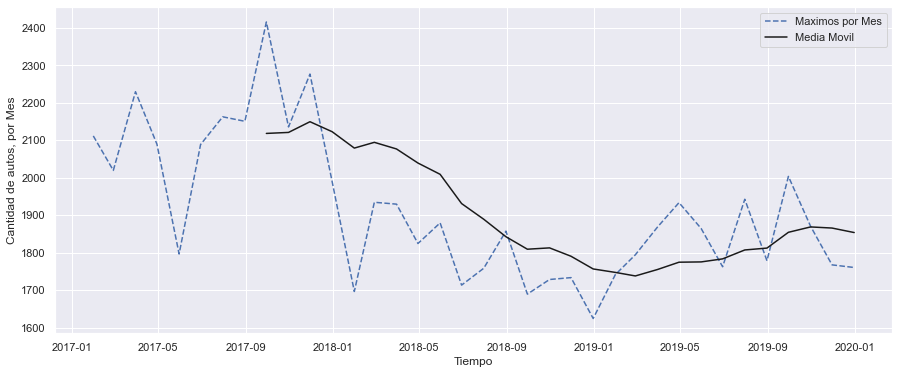

In [47]:
# Graficamos Los maximos:
tabla0["Máximo_medio"] = tabla0.Máximo.rolling(9).mean()

plt.figure(figsize = (15,6))
plt.plot(tabla0.index, tabla0.Máximo,ls='--',label="Maximos por Mes")
plt.plot(tabla0.Máximo_medio,c="k",ls="solid",lw=1.5,label="Media Movil")

plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por Mes')
plt.legend()
plt.show()


### **Serie completa**
_En este apartado vamos a descomponer la serie y analizar la distribucion de residuos_

In [48]:
# El modelo que usaremos para la descomposicion será aditivo ya que como vimos antes, la frencuencia de la serie de tiempo
# no es muy erratica y cada dato tiene un comportamiento de ida y vuelta, a diferencia de un tipo multiplicativo cuyos datos
# tienden a aumentar sin retroceder demasiado.
from statsmodels.tsa.seasonal import seasonal_decompose

In [49]:
# Con un resampleo por dia como hicimos al principio de este proyecto (con el nombre "diario") notamos que habia mucho ruido
# por lo tanto opte por resamplear
# la serie de forma semanal con el fin de "suavizarla" y ver que ocurre cuando 
# la descomponemos. 
result = seasonal_decompose(diario.cantidad_pasos.resample("W").mean(), model='additive')

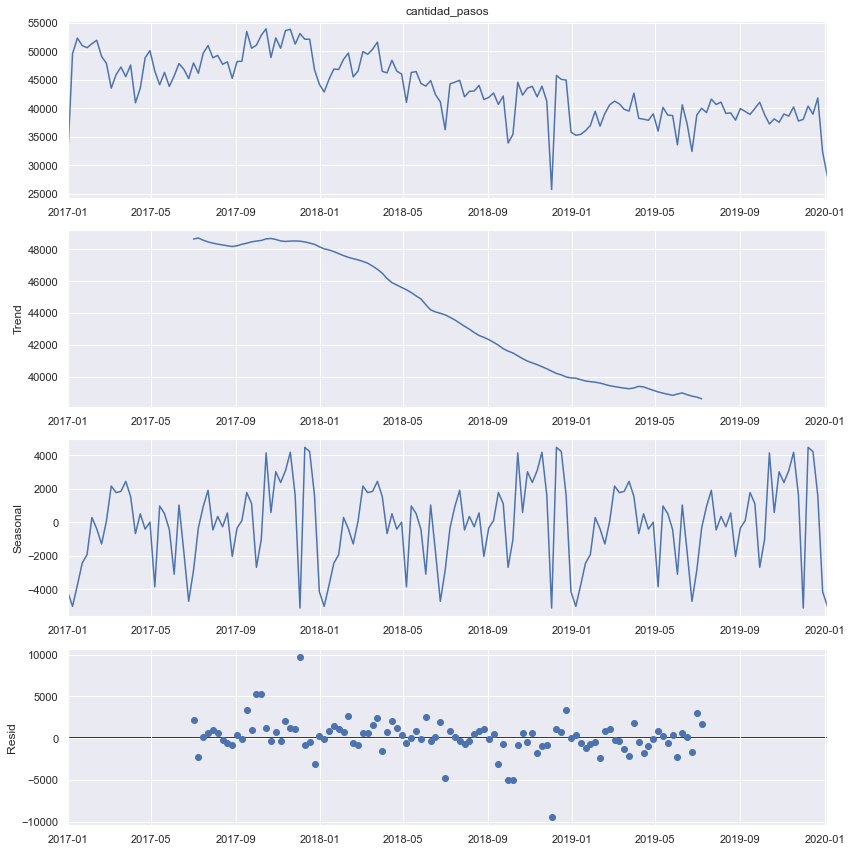

In [50]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

<AxesSubplot:xlabel='resid', ylabel='Density'>

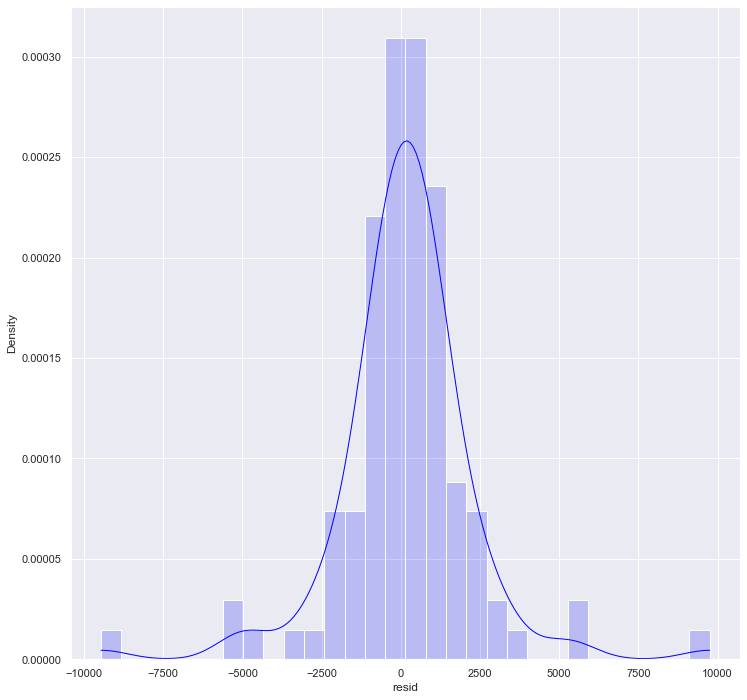

In [51]:
# Análisis de Residuo
sns.histplot(data = result.resid, stat = "density",kde = True, line_kws= {"linewidth":1},color = "blue",alpha= 0.2)

In [52]:
# Conclusión Residuo: Que los residuos de un modelo de la serie de tiempo se distribuyan de forma normal es una condición 
# necesaria para que los intervalos de confianza asociados a los predictores (calculados a partir de modelos teóricos) 
# sean precisos.

In [53]:
from statsmodels.tsa.stattools import adfuller

In [54]:
adf = adfuller(dataset.cantidad_pasos,maxlag=1)
print("T Test:", adf[0])
print("Valor P:", adf[1])
print("valores Criticos:", adf[4])

T Test: -323.8687473101599
Valor P: 0.0
valores Criticos: {'1%': -3.430377376616589, '5%': -2.8615521001131428, '10%': -2.5667764404533053}


#### Outliers
En este apartado veremos cuales son los outliers que estan presentes en la serie completa resamplado por día, el cual ya a simple vista podemos notar por lo menos 5 outliers que vimos en el primer grafico al comienzo del análisis exploratorio.
Usaremos la libreria Plotly para graficar porque considero que ademas de ser facil su uso, es interactiva y nos mostrara especificamente que dato es el valor atipico sin necesidad de localizarlo a travez de extensas lineas de codigo.

In [55]:
import  plotly.express  as  px
fig = px.line(diario, x = diario.index, y = diario.cantidad_pasos)
fig.show()

In [56]:
# Probamos tambien para los outliers semanales.
fig = px.line(diario.resample("W").mean(),x = diario.resample("W").mean().index,y=diario.cantidad_pasos.resample("W").mean())
fig.show()

Notamos que para 6/4/2017, 25/6/2018, 25/9/2018, 30/11/2018, 1/12/2018 y 29/5/2019, vemos que el comportamiento de la series es atipica. En este sentido, esta serie pudo sufrir de variaciones exogenas que no tienen que ver con la serie en general debido a que son muy pocos los outliers y es muy marcado en determinadas fechas. Utilizando información externa vemos que ocurrio esos días:
- **6/4/2017**: [Los piquetes y la falta de transporte fortalecen el paro de la CGT contra el gobierno](https://www.infobae.com/politica/2017/04/06/la-cgt-hace-su-primer-paro-contra-el-gobierno-y-la-izquierda-advirtio-que-habra-gran-cantidad-de-piquetes/)
- **25/6/2018**: [#ParoNacional: cortes, piquetes y manifestaciones en Buenos Aires](https://misionesonline.net/2018/06/25/paronacional-cortes-piquetes-manifestaciones-buenos-aires/)
- **25/9/2018**: Un poco mas ilustrativo que los anteriores, fotos de como estaban las calles para ese día. Reflejo cabal de la imposibilidad de transitar. [Huelga, marchas y piquetes: fotos del paro general contra el gobierno nacional](https://www.infobae.com/fotos/2018/09/25/huelga-marchas-y-piquetes-fotos-del-paro-general-contra-el-gobierno-nacional/)
- **30/11/2018 y 1/12/2018**: Mas allá del operativo en la ciudad, tambien hubo manifestaciones pero pasaron desapercibidas por la magnitud que representó el G20 en Argentina.[Lo que la cumbre del G20 en Argentina nos dejó](https://www.fundeps.org/cumbre-g20-argentina/). Tambien para la semana del 2 de Dicimbre la circulación fue bajisima, esto puede reflejar lo que fue el desmantelamiento y acomodo de la ciudad propia del G20.
- **29/5/2019**: [Paro contra el gobierno de Macri: los manifestantes empiezan a llegar al Obelisco para el acto central](https://www.infobae.com/politica/2019/05/29/los-piquetes-y-la-falta-de-transporte-hacen-sentir-el-paro-contra-el-gobierno-de-macri/)
- Se asume que los picos al comienzo y al final de la serie de tiempo resampleada por semana se debio a que la informacion del data set comienza y termina en esas fechas.

Vemos que los piquetes fueron los grandes protagonistas de los outliers en nuestra serie de tiempo. Es interesante análizar que ocurrió en esos picos de la serie para poder encontrar una solucion a tal problema, esto es, si tiene que ver por factores exogenos o endogenos. En este caso, claramente fue exogeno.

### **Modelos Machine Learning**
Para esta sección vamos a preparar algunos modelos de Machine Learning como vistazo previo a otros modelos mas complejos. Si bien usaremos modelos de ML robustos, no sabemos como se comportaran para este tipo de problemas.

### _Autocorrelación_
Previamente verificamos la Autocorrelacion asi ya nos queda hecho para cuando armemos los modelos estadisticos.

In [57]:
# Se trabajara con la media semanal debido al ruido observado previamente. Fundamentalmente la idea trabajar con la media
# de manera tal que el modelo interprete de mejor manera los datos
senial = diario.resample("W").mean()
senial = senial.drop(columns = ["periodo"],axis=1)
senial

cantidad_pasos
fecha                     
2017-01-01    31183.000000
2017-01-08    49601.714286
2017-01-15    52344.714286
2017-01-22    51030.714286
2017-01-29    50654.428571
...                    ...
2019-12-08    40413.000000
2019-12-15    38994.285714
2019-12-22    41840.142857
2019-12-29    32341.428571
2020-01-05    27985.000000

[158 rows x 1 columns]

In [58]:
### llamamos las librerias de Statsmodels encargadas en la autocorrelacion para MA y la autocorrelacion parcial para AR.
# La libreria incluye tambien metodos para graficar los mismos.
from statsmodels.graphics.tsaplots import acf
from statsmodels.graphics.tsaplots import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [59]:
# definimos un lag de 3 años (por la serie) multiplicado por 53 de manera tal que el total sea la cantidad de instancias
# del dataset resampleado.
nlags= 52 *3
autoc= acf(senial.cantidad_pasos, nlags= nlags, fft=False)
autoc.shape

(157,)

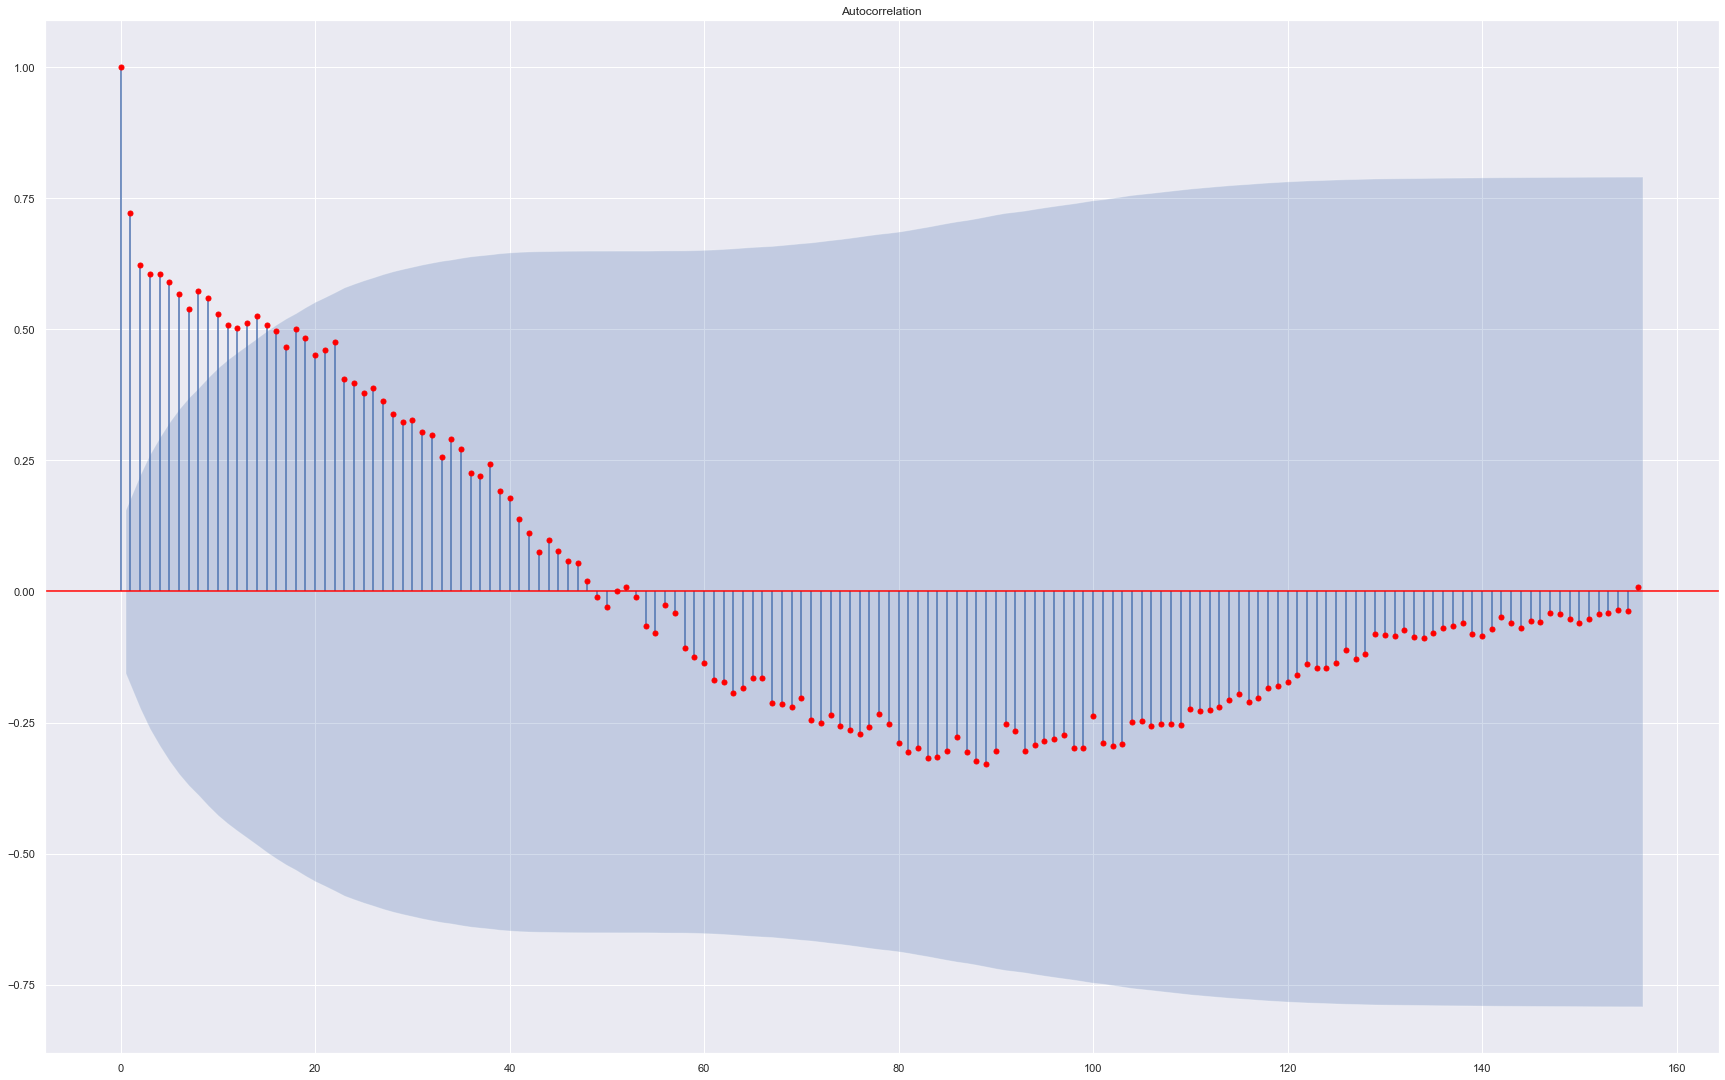

In [60]:
fig, ejes = plt.subplots(figsize=(30,19))
plot_acf(senial.cantidad_pasos, lags = nlags,ax=ejes,color="red",use_vlines=True)
    
plt.show()

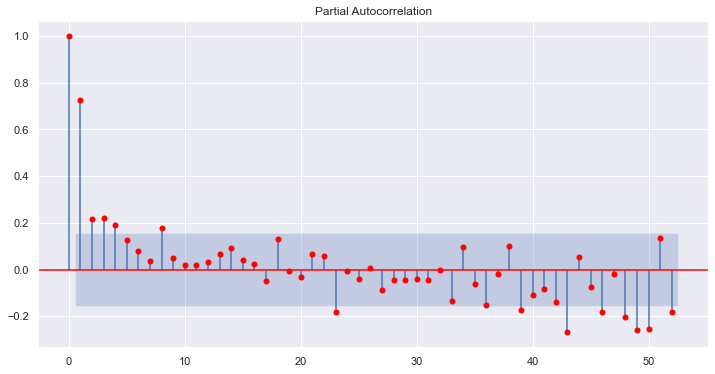

In [61]:
# Ahora vemos que ocurre con la PCAF.
Nlags= 52
pautoc= pacf(senial.cantidad_pasos, nlags= Nlags)
pautoc.shape

fig, ejes = plt.subplots(figsize=(12,6))
plot_pacf(senial.cantidad_pasos,lags=Nlags,ax=ejes,color="red")
plt.show()

### Benchmark
_El benchmark aqui presente será utilizando el primer y segundo semestre del 2019. Esperamos ver algún comportamiento semejante debido a que ya comprobamos a que la serie es estacionaria y por ende, el comportamiento puede llegar a ser parecido a lo largo de esos meses. Podra ser repetitivo hacer siempre un resampleo pero asi logramos
 omitir algun error que pueda llegar a arrastrarse hasta aquí. En esta parte se resamplea nuevamente por semana, 
quitamos el outlier del 2 de Diciembre y luego interpolamos la serie para que los tiempos de muestreo esten igualmente
espaciados.._

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [63]:
# semestre para X
limite_X1 = "2019-01-01"
limite_X2 = "2019-06-30"
X_total = senial[(senial.index >=limite_X1)&(senial.index<=limite_X2)]

# semestre para predecir Y
limite_y1 = "2019-07-01"
limite_y2 = "2019-12-31"
y_total = senial[(senial.index >=limite_y1)&(senial.index<=limite_y2)]
print(X_total.shape)
print(y_total.shape)

(26, 1)
(26, 1)


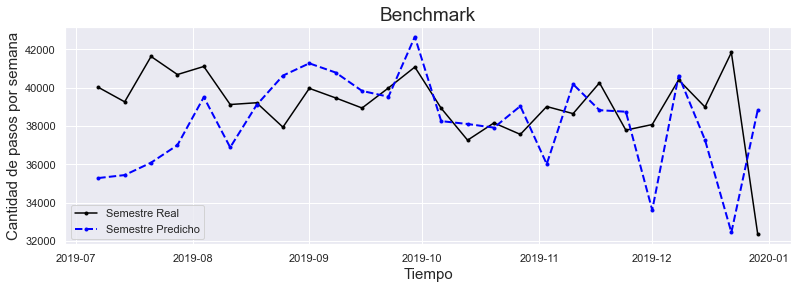

In [64]:
# Se realizó un Benchmark simple con el método rolling y fijando una sola ventana.
y_benchmark = X_total.rolling(window=1, center=False).sum()
plt.figure(figsize=(13,4))
plt.plot(y_total.index, y_total, marker='.',color='black', label='Semestre Real')
plt.plot(y_total.index, y_benchmark,marker='.', lw=2, color='blue',ls = "--", label='Semestre Predicho')
plt.title('Benchmark', size= 19)
plt.xlabel('Tiempo', size= 15)
plt.ylabel('Cantidad de pasos por semana', size= 15)
plt.legend()
plt.show()

In [65]:
error=np.sqrt(mean_squared_error(y_total,y_benchmark))
print('RMSE en Benchmark: ', error)

RMSE en Benchmark:  3248.292155063454


### _Sin Optimizar_
Vamos a usar dos modelos tradicionales de Machine Learning, un Random Forest representando un modelo del tipo boosting, y otro del tipo bagging como un AdaBoost. Veremos que tal se comportan con sus parametros por defecto y luego los optimizaremos.
#### RandomForest

(156, 1)


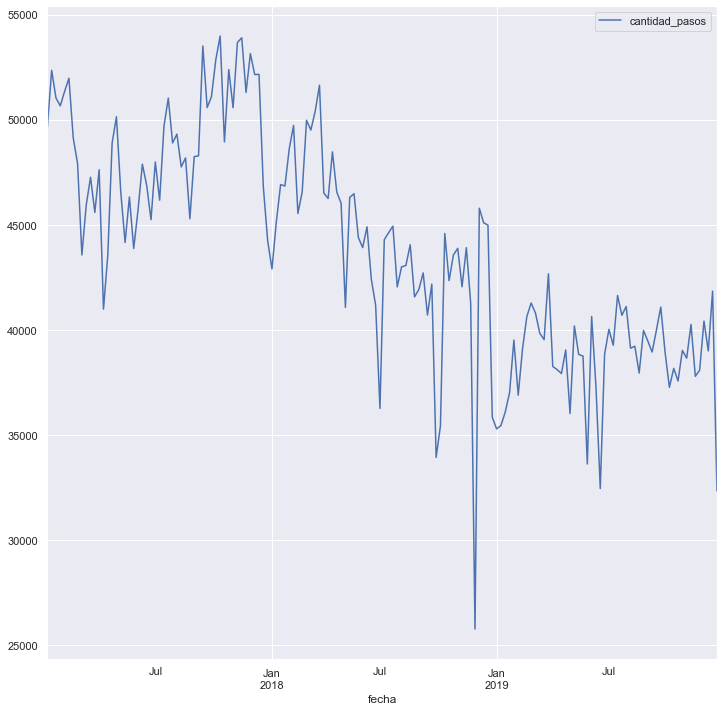

In [66]:
# Acomodamos el dataset cortando las primeras y ultimas semanas para no visualizar mas esa lineas que comienzan desde 0. Y
# que como vimos en el benchmark, puede estar afectando a la predicción.
senial = senial[(senial.index >='2017-01-08')&(senial.index<='2019-12-29')]
print(senial.shape)
senial.plot()
plt.show()

In [67]:
senial = senial.cantidad_pasos
senial

fecha
2017-01-08    49601.714286
2017-01-15    52344.714286
2017-01-22    51030.714286
2017-01-29    50654.428571
2017-02-05    51343.000000
                  ...     
2019-12-01    38079.285714
2019-12-08    40413.000000
2019-12-15    38994.285714
2019-12-22    41840.142857
2019-12-29    32341.428571
Freq: W-SUN, Name: cantidad_pasos, Length: 156, dtype: float64

In [68]:
# Importamos las librerias que usaremos para esta predicción.
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import  GridSearchCV, TimeSeriesSplit
from sklearn.model_selection import cross_val_score
ts=TimeSeriesSplit(n_splits=3)

In [69]:
look_back = 15
# Creamos los X e y con ceros para luego llenar con los datos y los llenamos en la proxima celda de iteración.
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(140, 15) (140,)


In [70]:
for i in range(X.shape[0]):
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [71]:
N_train = 145 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 10 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(130, 15) (130,)
(10, 15) (10,)


In [72]:
forest = RandomForestRegressor(random_state=42, n_jobs = 2).fit(X_train,y_train)
y_train_pred_forest = forest.predict(X_train)
y_test_pred_forest = forest.predict(X_test)

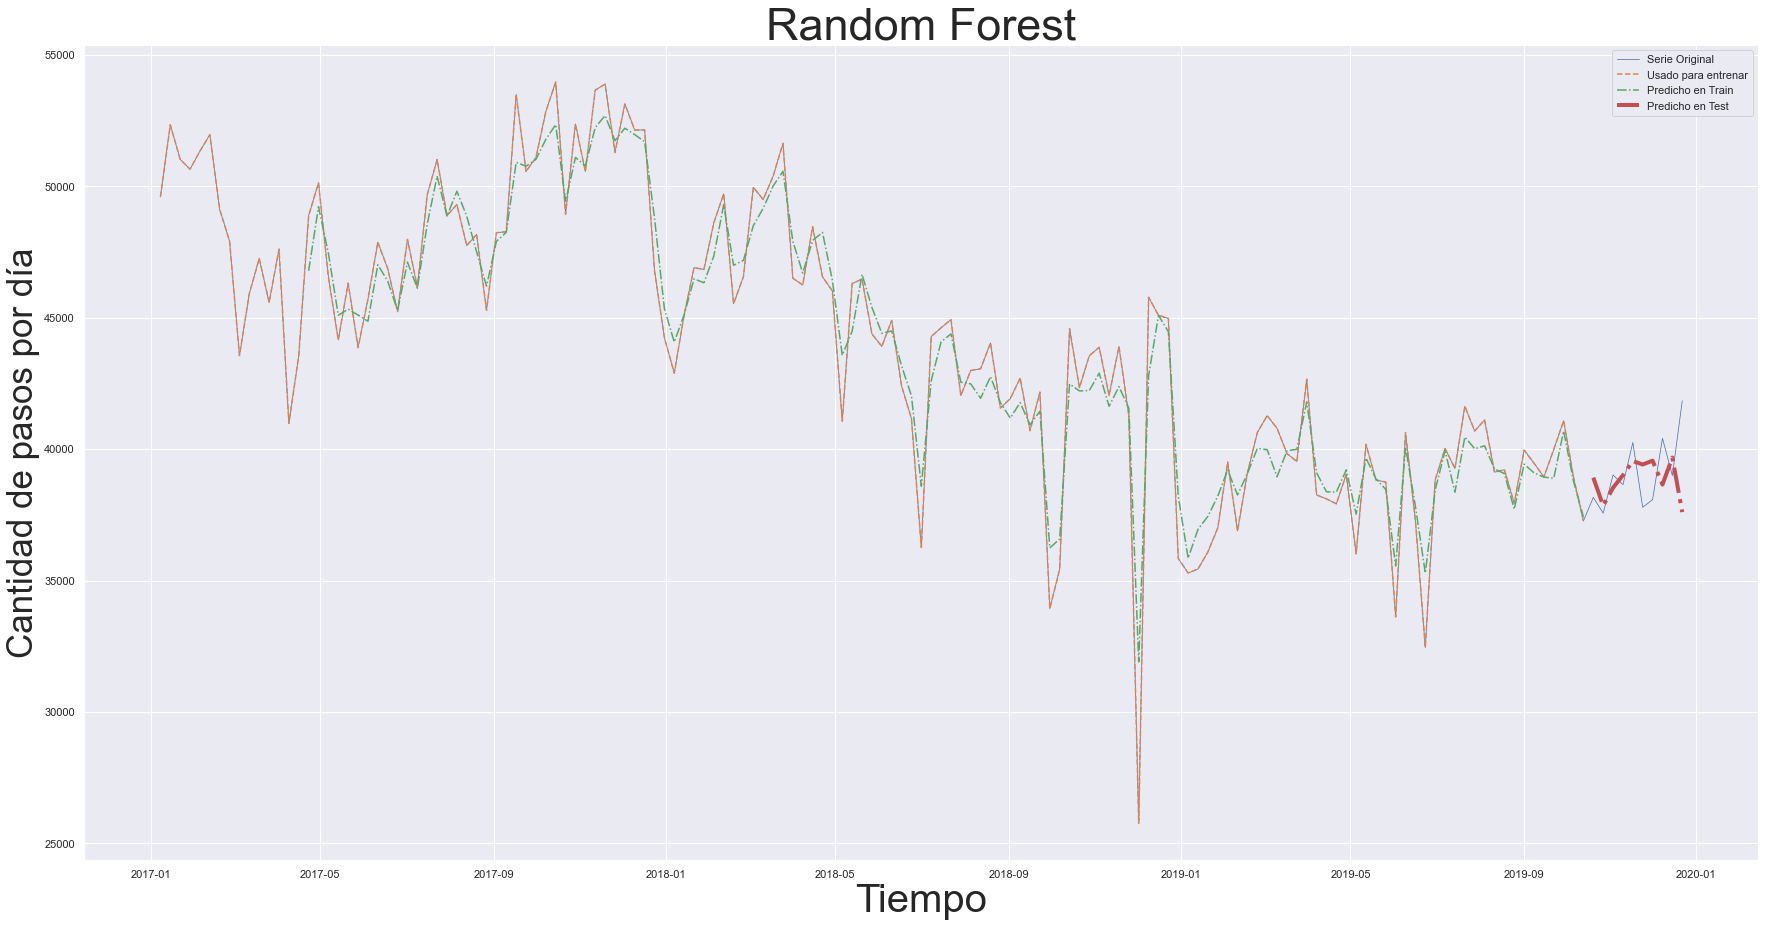

In [73]:
plt.figure(figsize=(30,15))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75,ls="solid", label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred_forest,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total],y_test_pred_forest,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.title('Random Forest', size= 45)
plt.xlabel('Tiempo', size= 40)
plt.ylabel('Cantidad de pasos por día', size= 35)
plt.legend()
plt.show()

In [74]:
# Error Randomforest 
print("R2 Random Forest para el conjunto Train: ", r2_score(y_train, y_train_pred_forest))
print("R2 Random Forest para el conjunto Test: ",r2_score(y_test, y_test_pred_forest))

print("RMSE Entrenamiento: ", np.sqrt(mean_squared_error(y_train, y_train_pred_forest)))
print("RMSE Test: ", np.sqrt(mean_squared_error(y_test, y_test_pred_forest)))

R2 Random Forest para el conjunto Train:  0.948524323815454
R2 Random Forest para el conjunto Test:  -0.6613823210795473
RMSE Entrenamiento:  1194.8290920661452
RMSE Test:  1670.0941569469571


#### Adaboost

In [75]:
adab = AdaBoostRegressor().fit(X_train,y_train)
y_train_pred_adab = adab.predict(X_train)
y_test_pred_adab = adab.predict(X_test)

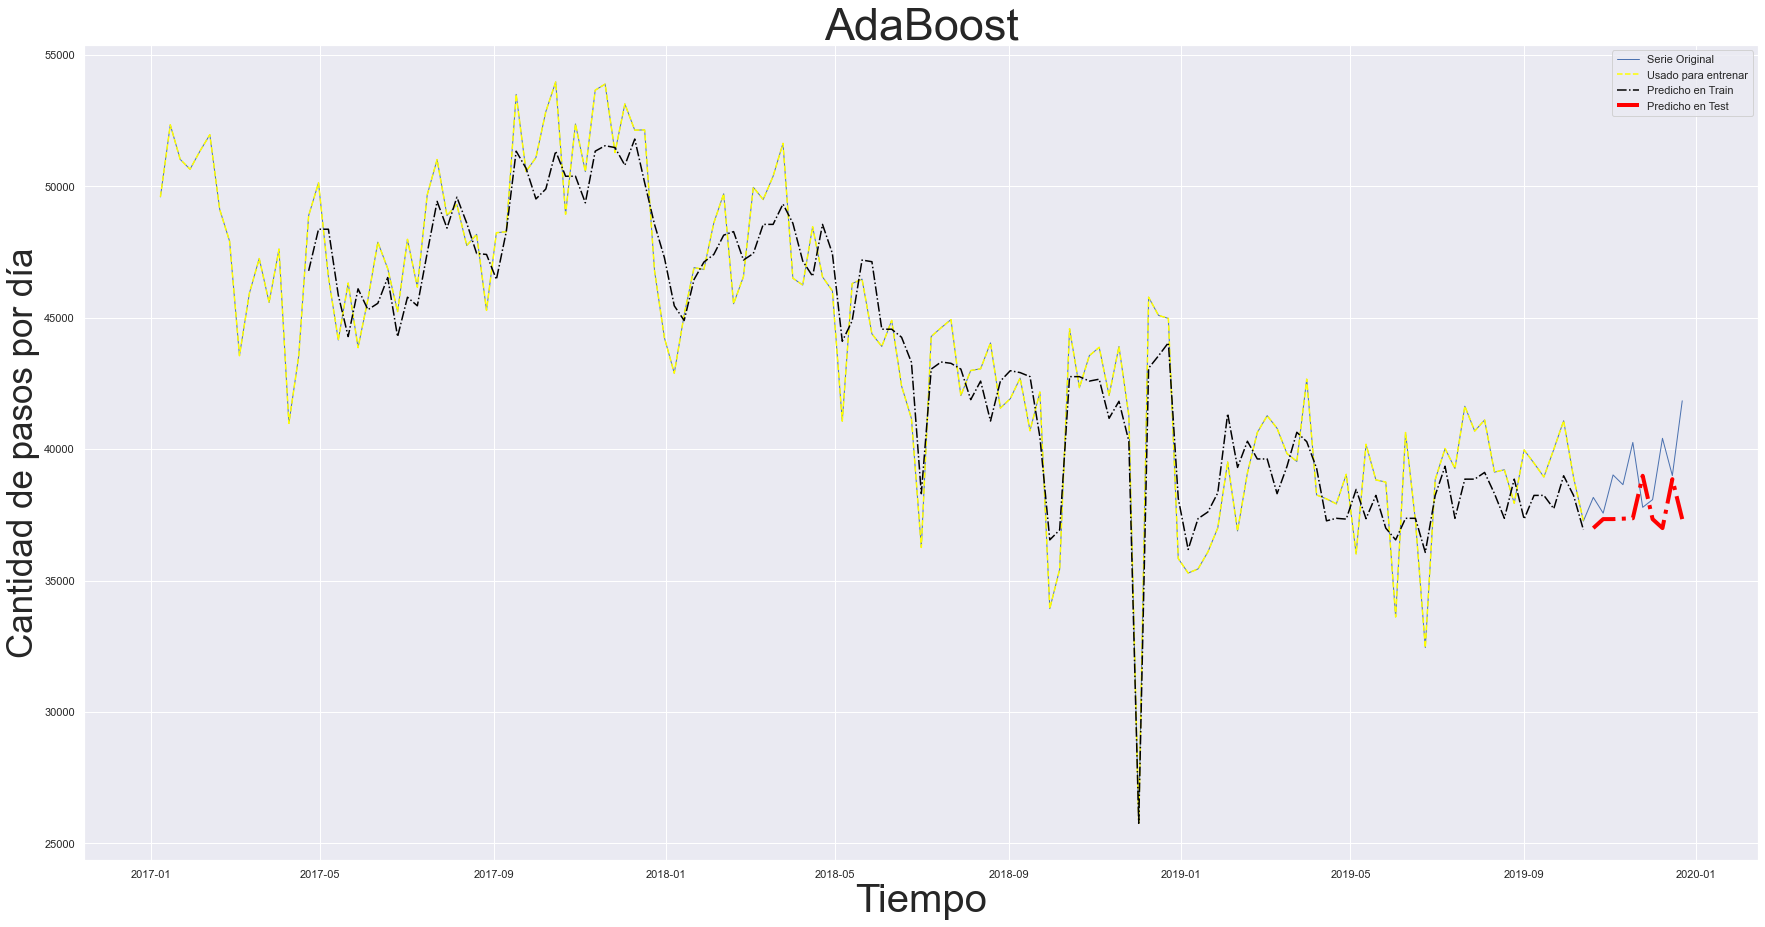

In [76]:
plt.figure(figsize=(30,15))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 1,ls="solid", label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--',color="yellow", label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred_adab,'-.',color='black',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_adab,'-.',color="red", lw = 4, label = 'Predicho en Test')
plt.legend()
plt.title('AdaBoost', size= 45)
plt.xlabel('Tiempo', size= 40)
plt.ylabel('Cantidad de pasos por día', size= 35)
plt.legend()
plt.show()

In [77]:
print("R2 Entrenamiento",r2_score(y_train,y_train_pred_adab))
print("R2 Test", r2_score(y_test,y_test_pred_adab))

print("RMSE Entrenamiento: ", np.sqrt(mean_squared_error(y_train, y_train_pred_adab)))
print("RMSE Test: ", np.sqrt(mean_squared_error(y_test, y_test_pred_adab)))

R2 Entrenamiento 0.8906563977599817
R2 Test -1.8727649805417443
RMSE Entrenamiento:  1741.4116555199444
RMSE Test:  2196.120739017611


### _Optimizados_
El ciclo para optimizar los modelos es el mismo que desarrollamos en otros proyectos, armamos una grilla con los mejores hiperparametros que podrian ajustarse a la problematica y le incorporamos un grinsearch con el cross validation. Haremos el mismo procedimiento para ambos modelos.
#### Random Forest


In [78]:
forest_grid = RandomForestRegressor()

In [79]:
param_grid_forest = {"n_estimators":[100,200,300,350],
                    "max_features": ["auto", "log2","sqrt"],
                     "min_samples_leaf":[0.01,0.1,1],
                     "criterion":["mse","mae"],
                     "min_samples_split":[0.1,0.01,1,2],
                     "max_depth": [None,5,10,15,20],
                    "oob_score":[True]}

In [80]:
model_forest = GridSearchCV(forest_grid,param_grid=param_grid_forest,cv=ts,n_jobs=-2)

In [86]:
model_forest.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning:

One or more of the test scores are non-finite: [-0.69174417 -0.70431213 -0.62703229 ... -0.63674616 -0.67607075
 -0.69686913]



GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=RandomForestRegressor(), n_jobs=-2,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [0.01, 0.1, 1],
                         'min_samples_split': [0.1, 0.01, 1, 2],
                         'n_estimators': [100, 200, 300, 350],
                         'oob_score': [True]})

In [87]:
print("Mejores parametros: "+str(model_forest.best_params_))
print("Mejor Score: "+str(model_forest.best_score_)+'\n')

Mejores parametros: {'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 0.1, 'min_samples_split': 2, 'n_estimators': 100, 'oob_score': True}
Mejor Score: -0.3636474261997031



In [88]:
forest_op = RandomForestRegressor(criterion="mse",max_depth=10,max_features="auto",n_estimators=100,
                                 min_samples_leaf=0.1,min_samples_split=2,oob_score=True)

In [89]:
forest_op.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=0.1, oob_score=True)

In [90]:
y_train_pred_forest_op = forest_op.predict(X_train)
y_test_pred_forest_op = forest_op.predict(X_test)

print("R2 Entrenamiento Arbol de Decision",r2_score(y_train,y_train_pred_forest_op))
print("R2 Test Arbol de Decision: ", r2_score(y_test,y_test_pred_forest_op))

print("RMSE Entrenamiento: ", np.sqrt(mean_squared_error(y_train, y_train_pred_forest_op)))
print("RMSE Test: ", np.sqrt(mean_squared_error(y_test, y_test_pred_forest_op)))

R2 Entrenamiento Arbol de Decision 0.7734679033554633
R2 Test Arbol de Decision:  -0.3364669649441696
RMSE Entrenamiento:  2506.5110905435713
RMSE Test:  1497.9084762053399


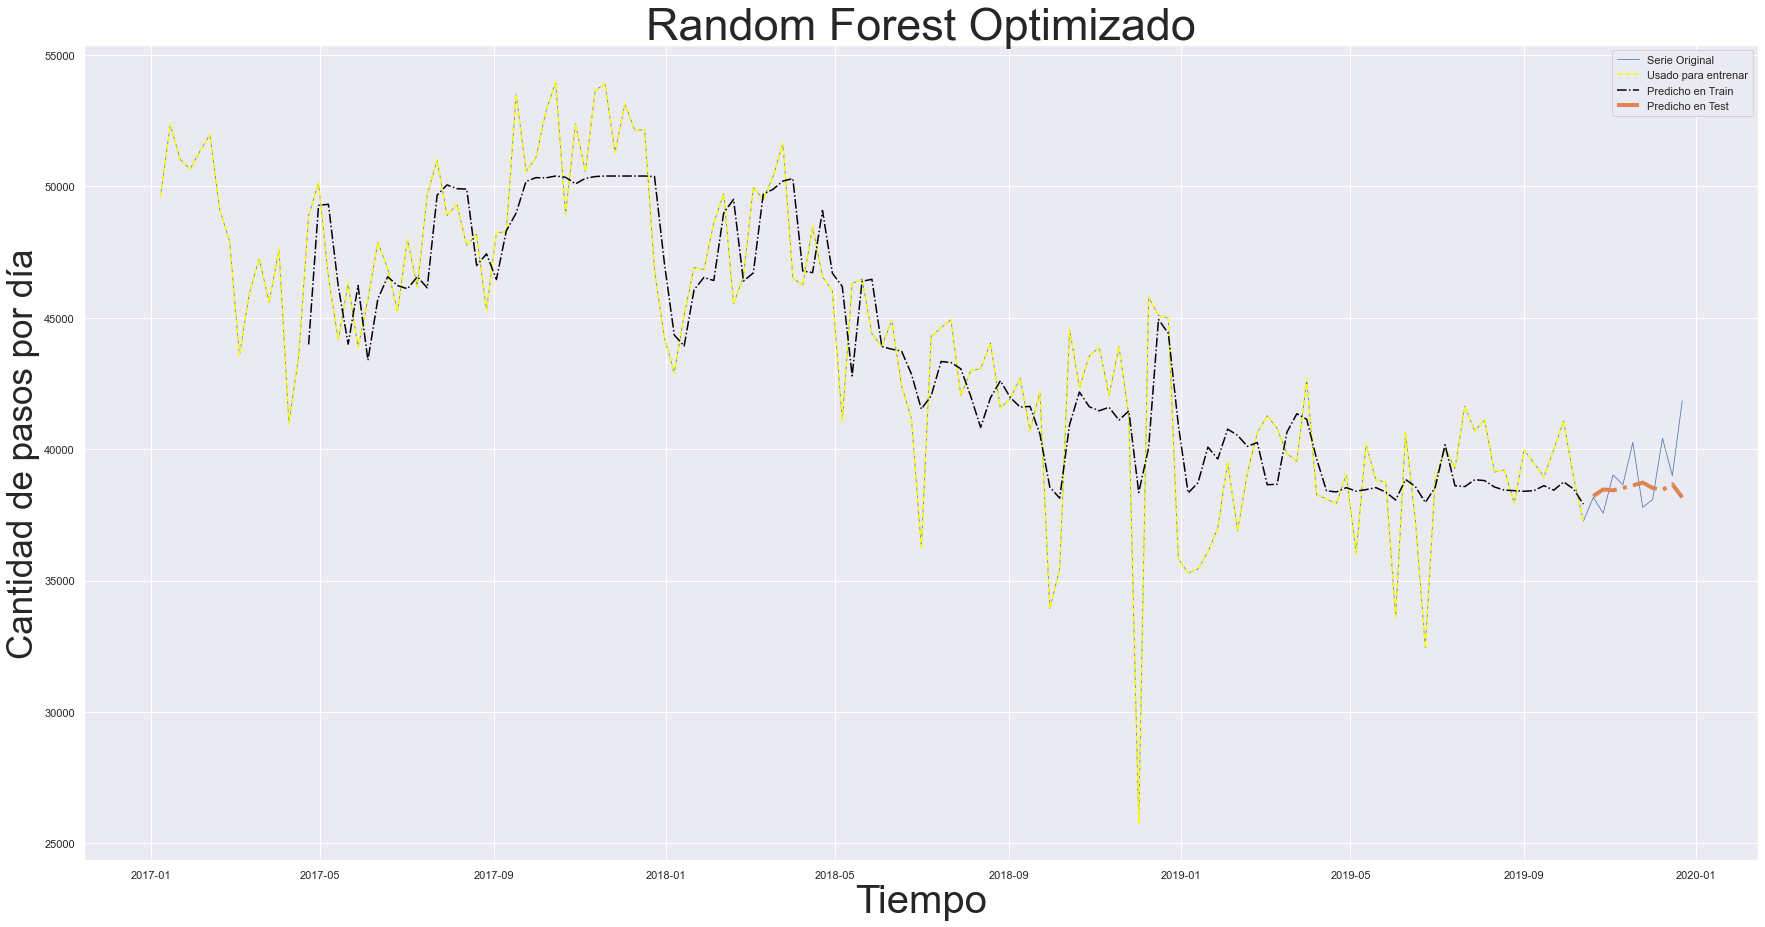

In [91]:
plt.figure(figsize=(30,15))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75,ls="solid", label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--',color="yellow", label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred_forest_op,'-.',color="black",label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_forest_op,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.title('Random Forest Optimizado', size= 45)
plt.xlabel('Tiempo', size= 40)
plt.ylabel('Cantidad de pasos por día', size= 35)
plt.legend()
plt.show()

####  Adaboost


In [92]:
adab_grid= AdaBoostRegressor()

In [93]:
param_grid_adab = {"n_estimators":[1,15,30,50,100],
                  "loss":["linear","square","exponential"],
                  "learning_rate": [0.1,1,0.5]}

In [95]:
model_adab = GridSearchCV(adab_grid,param_grid=param_grid_adab,cv=ts,n_jobs=-2)
model_adab.fit(X_train,y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=AdaBoostRegressor(), n_jobs=-2,
             param_grid={'learning_rate': [0.1, 1, 0.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [1, 15, 30, 50, 100]})

In [96]:
print("Mejores parametros: "+str(model_adab.best_params_))
print("Mejor Score: "+str(model_adab.best_score_)+'\n')

Mejores parametros: {'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 50}
Mejor Score: -0.49725464494932164



In [97]:
adab_op = AdaBoostRegressor(learning_rate=1,loss="exponential",n_estimators=50)

In [98]:
adab_op.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=1, loss='exponential')

In [99]:
y_train_pred_adab_op = adab_op.predict(X_train)
y_test_pred_adab_op = adab_op.predict(X_test)

print("R2 Entrenamiento Arbol de Decision",r2_score(y_train,y_train_pred_adab_op))
print("R2 Test Arbol de Decision: ", r2_score(y_test,y_test_pred_adab_op))
print("RMSE Entrenamiento: ", np.sqrt(mean_squared_error(y_train, y_train_pred_adab_op)))
print("RMSE Test: ", np.sqrt(mean_squared_error(y_test, y_test_pred_adab_op)))

R2 Entrenamiento Arbol de Decision 0.8963682680308437
R2 Test Arbol de Decision:  -1.0921479506109777
RMSE Entrenamiento:  1695.3178569842419
RMSE Test:  1874.1414279268


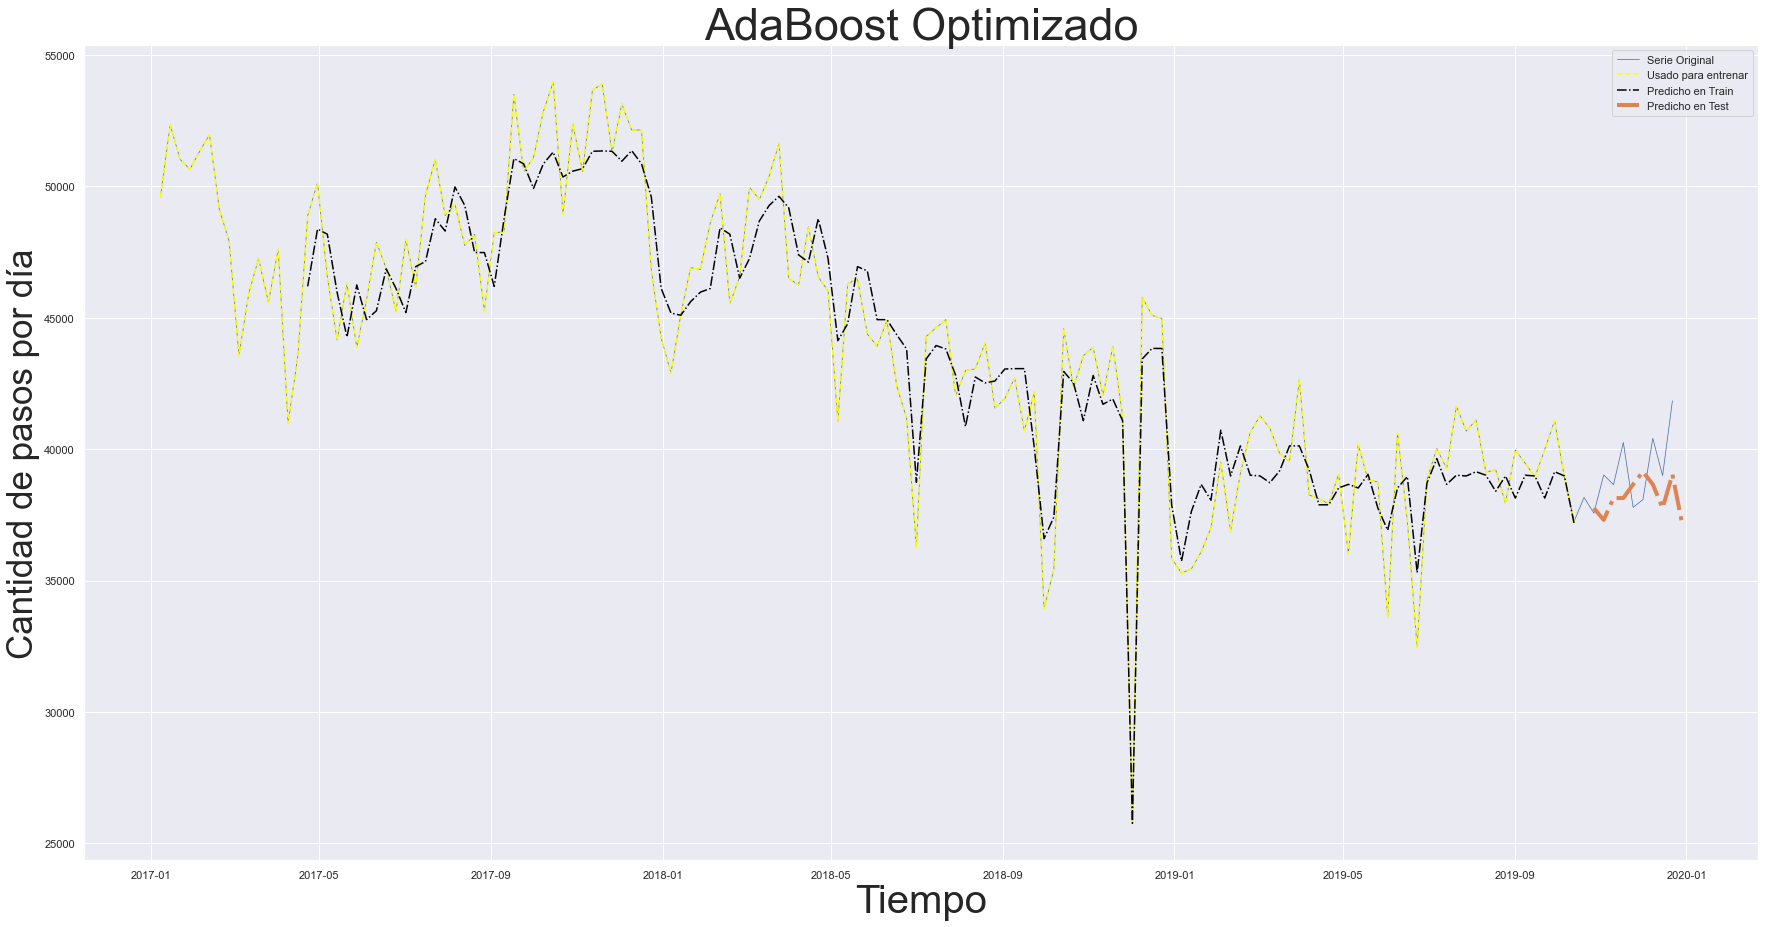

In [100]:
plt.figure(figsize=(30,15))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75,ls="solid", label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--',color="yellow", label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred_adab_op,'-.',color="black",label = 'Predicho en Train')
plt.plot(senial.index[1+N_train+look_back: length_total+1], y_test_pred_adab_op,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.title('AdaBoost Optimizado', size= 45)
plt.xlabel('Tiempo', size= 40)
plt.ylabel('Cantidad de pasos por día', size= 35)
plt.legend()
plt.show()

### **Modelos Estadisticos**
Hasta aquí hemos utilizado modelos tradicionales de Machine Learning para hacer este tipo de trabajos que son mas de naturaleza estadistica, por lo tanto nos enfocaremos en usar modelos que son para este tipo de problemas.

Teniendo en cuenta los valores arrojados en las autocorrelaciones, usaremos un modelo SARiMAX el cual está formado por, una parte autorregresiva (AR) y otra de media móvil (MA) mas la diferenciasion (d). ESte modelo utiliza variaciones y regresiones de datos a fin de encontrar patrones para una predicción futura mas eficiente.

**Autocorrelación:**
- MA: 16
- AR: 3

A Continuación, importamos las librerias para esta tarea. La primeras se usaran para predecir datos del 2019, y luego se usara la libreria Facebook Prophet para predecir el año 2020.

In [94]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import itertools
from tqdm import tqdm_notebook

In [95]:
# Aquí probamos distintas combinación de (p,d,q) para luego incluirlos en un ciclo For y que el modelo entrene a partir
# de la combinación de distintos parametros.
d=range(0,3)
p=q=range(7,16)
pdq=list(itertools.product (p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12)
              for x in list(itertools.product (p,d,q)) ]
print('Ejemplos de combinaciones de parametros para SARIMAX ....')
print('SARIMAX:{} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX:{} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX:{} x {}'.format(pdq[2],seasonal_pdq[4]))

Ejemplos de combinaciones de parametros para SARIMAX ....
SARIMAX:(7, 0, 8) x (7, 0, 8, 12)
SARIMAX:(7, 0, 8) x (7, 0, 9, 12)
SARIMAX:(7, 0, 9) x (7, 0, 10, 12)
SARIMAX:(7, 0, 9) x (7, 0, 11, 12)


In [96]:
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod=sm.tsa.statespace.SARIMAX (y,
#                                            order= param,
#                                            seasonal_order=param_seasonal,
#                                            enforce_stationarity=False,
#                                            enforce_invertibility=False)
#             results=mod.fit()
            
#             print('SARIMAX{}x{} - AIC:{}'.format(param,param_seasonal, results.aic))
            
#         except:
#             continue

In [104]:
# Entrenamos el modelo con la ultima combinación del ciclo For para el sarimax.
model = sm.tsa.statespace.SARIMAX(senial,
                                order=(10, 1, 8),
                                seasonal_order=(10, 1, 8, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

resultado = model.fit()

print(resultado.summary())

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                      SARIMAX Results                                       
Dep. Variable:                       cantidad_pasos   No. Observations:                  156
Model:             SARIMAX(10, 1, 8)x(10, 1, 8, 12)   Log Likelihood                -120.592
Date:                              Thu, 11 Mar 2021   AIC                            315.183
Time:                                      16:33:41   BIC                            336.086
Sample:                                  01-08-2017   HQIC                           310.887
                                       - 12-29-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5643     34.088     -0.017      0.987     -67.375      66.246
ar.L2         -0.03

#### Sarimax One-Step año 2019
Probaremos con las dos estrategias para predecir, One y Multi Step Prediction. La idea fue predecir el ultimo semestre al igual que en el benchmark pero el modelo se comporto de manera muy erratica desde julio hasta aproximadamente finales de septiembre. Pero luego de septiembre el modelo es excelente.
A continuación muestro los dos y el porque eligiria uno que se ajuste por determinadas fechas:

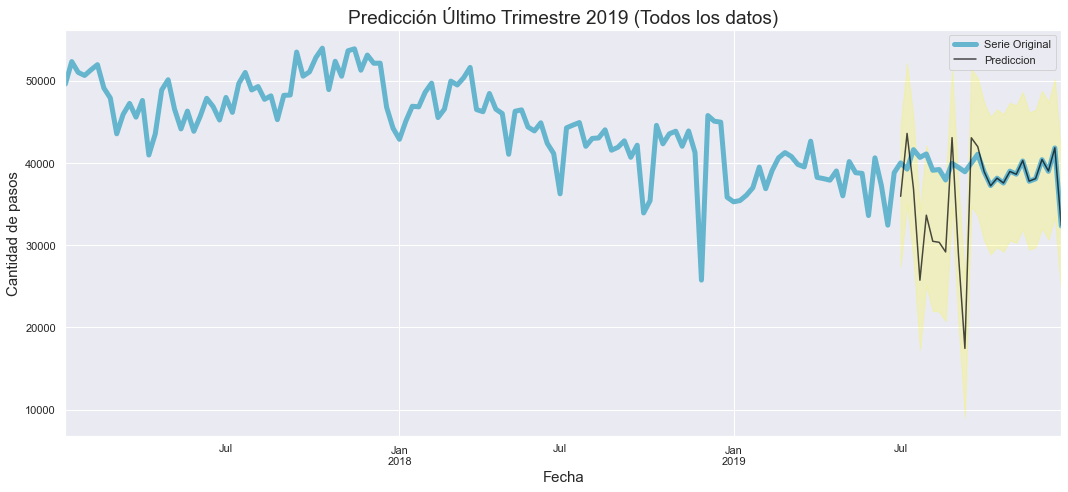

In [136]:
# Semestre 2019
pred = resultado.get_prediction(start=datetime.datetime(2019,7,7), dynamic=False)
c_pred = pred.conf_int()
ax = senial['2017':].plot(label='Serie Original',color='c',lw = 5,figsize=(15,7))

pred.predicted_mean.plot(ax=ax, label='Prediccion', alpha=0.7, color='Black')

ax.fill_between(c_pred.index,
                c_pred.iloc[:, 0],
                c_pred.iloc[:, 1], color='yellow', alpha=0.2)

plt.title("Predicción Último Trimestre 2019 (Todos los datos)", fontsize=19)
plt.xlabel('Fecha',size=15)
plt.ylabel('Cantidad de pasos', size=15)
plt.legend()
plt.tight_layout()
plt.show()

In [128]:
y_predf = pred.predicted_mean
y_real = senial['2019-07-07':]

error_one = np.sqrt(mean_squared_error(y_predf, y_real))
print('RMSE de One Step 2019: ', error_one)

RMSE de One Step 2019:  6682.167877082251


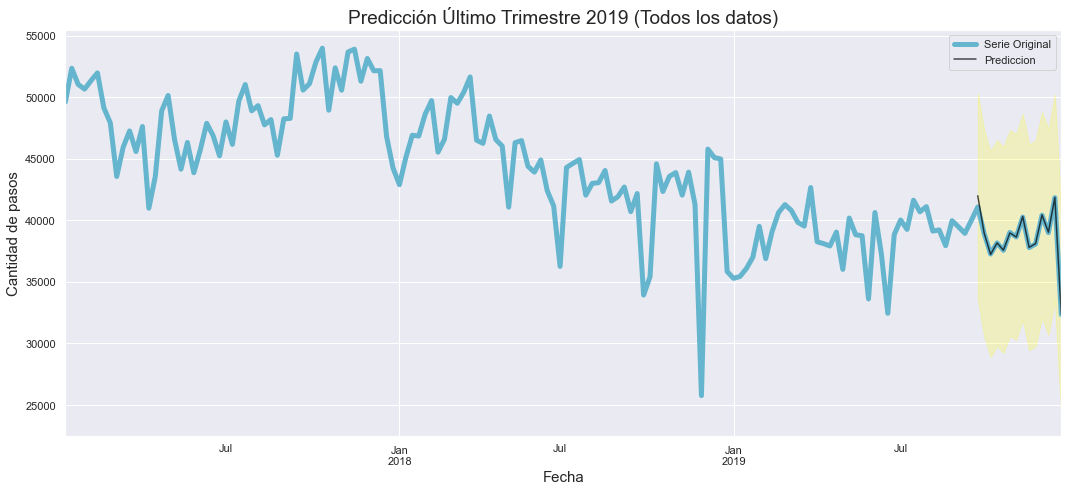

In [139]:
pred1 = resultado.get_prediction(start=datetime.datetime(2019,9,29), dynamic=False)
c_pred1 = pred1.conf_int()
ax = senial['2017':].plot(label='Serie Original',color='c',lw = 5,figsize=(15,7))

pred1.predicted_mean.plot(ax=ax, label='Prediccion', alpha=0.7, color='Black')

ax.fill_between(c_pred1.index,
                c_pred1.iloc[:, 0],
                c_pred1.iloc[:, 1], color='yellow', alpha=0.2)

plt.title("Predicción Último Trimestre 2019 (Todos los datos)", fontsize=19)
plt.xlabel('Fecha',size=15)
plt.ylabel('Cantidad de pasos', size=15)
plt.legend()
plt.tight_layout()
plt.show()

In [143]:
y_predf1 = pred1.predicted_mean
y_real = senial['2019-09-29':]

error_one1 = np.sqrt(mean_squared_error(y_predf1, y_real))
print('RMSE de One Step 2019: ', error_one1)

RMSE de One Step 2019:  245.74600245439683


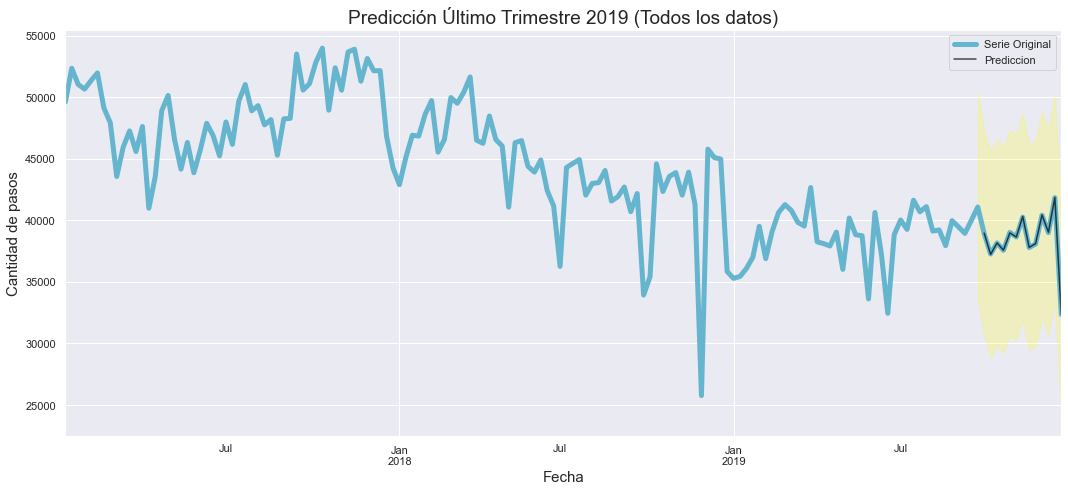

In [141]:
pred2 = resultado.get_prediction(start=datetime.datetime(2019,10,6), dynamic=False)
c_pred2 = pred2.conf_int()
ax = senial['2017':].plot(label='Serie Original',color='c',lw = 5,figsize=(15,7))

pred2.predicted_mean.plot(ax=ax, label='Prediccion', alpha=0.7, color='Black')

ax.fill_between(c_pred1.index,
                c_pred1.iloc[:, 0],
                c_pred1.iloc[:, 1], color='yellow', alpha=0.2)

plt.title("Predicción Último Trimestre 2019 (Todos los datos)", fontsize=19)
plt.xlabel('Fecha',size=15)
plt.ylabel('Cantidad de pasos', size=15)
plt.legend()
plt.tight_layout()
plt.show()

In [142]:
y_predf2 = pred2.predicted_mean
y_real = senial['2019-10-06':]

error_one2 = np.sqrt(mean_squared_error(y_predf2, y_real))
print('RMSE de One Step 2019: ', error_one2)

RMSE de One Step 2019:  28.724250890403106


#### SARIMAX Multi-Step año 2019
Para el multi-step se eligio la ultima fecha que probamos en el one-step debido a que fue la mejor.

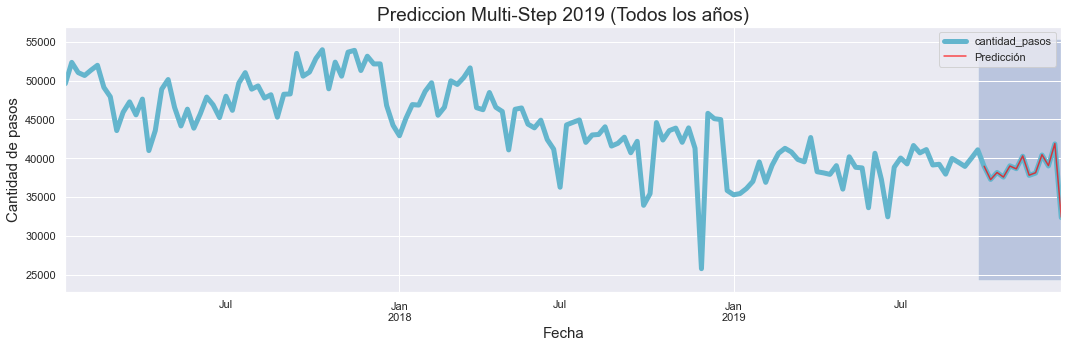

In [144]:
pred_m = resultado.get_prediction(start=datetime.datetime(2019, 10, 6), dynamic=True, full_results=True)
c_pred_m = pred_m.conf_int()

ax=senial['2017':].plot(color="c", lw=5, figsize=(15,5))
pred_m.predicted_mean.plot(ax= ax, label='Predicción', alpha=0.7, figsize=(15,5), color='red')

ax.fill_betweenx(ax.get_ylim(), datetime.datetime(2019,9,29), senial.index[-1], alpha=0.3, zorder=-1)

plt.title('Prediccion Multi-Step 2019 (Todos los años)', size= 19)
plt.xlabel('Fecha', size= 15)
plt.ylabel('Cantidad de pasos', size= 15)

plt.legend()
plt.tight_layout()
plt.show()

In [145]:
y_predf1 = pred_m.predicted_mean
y_real1 = senial['2019-10-06':]

error_mul = np.sqrt(mean_squared_error(y_predf1, y_real1))
print('RMSE para Multi-Step: ', error_mul)

RMSE para Multi-Step:  36.341575986015755


#### Pronostico 2020 Prophet
Usaremos la librería Prophet para hacer un pronostico del 2020 debido a su forma sencilla de uso y la gran popularidad que tiene en su uso de series de tiempo.
El ciclo de trabajo para esta parte es la siguiente:
- La librería exige que los datos esten dividos en dos columnas llamadas "ds" e "y". En la columna "ds", contendrá los valores de las fechas en un formato datetime, y para la variable "y", los datos que queremos pronosticar. Por lo tanto acomodaremos primero el dataset.
- Para este pronostico trabajaremos con la series de datos diarios ya que para esta librería es mejor usar los datos presentados de esa forma.
- Para quitar el ruido que conlleva hacerlo de forma diaria, vamos a tranfosmar la serie con un metodo BoxCox para suavizarla y que prediga mejor nuestros datos.
- Finalmente, mostraremos dos graficas, la original y la que quedo luego de la transformación para verificar si el comportamiento es similar en ambas series. Realizada la verificación, vamos a entrenar el modelo y vemos que tan bien se comporta, revizando luego sus salidas y que tan bien pronostico los datos.

In [97]:
from scipy.stats import boxcox
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [98]:
# preparamos el dataset, utilizamos la diaria y quitamos los outliers vistos anteriormente.
prophet = diario.copy()
prophet = prophet.drop(columns="periodo",axis=1)
prophet = prophet[prophet["cantidad_pasos"]>400]
prophet = prophet.reset_index(inplace=False)
prophet.columns = ["ds","y"]
prophet["ds"] = pd.to_datetime(prophet.ds)
prophet

ds        y
0    2017-01-01  31183.0
1    2017-01-02  51568.0
2    2017-01-03  51093.0
3    2017-01-04  53332.0
4    2017-01-05  56486.0
...         ...      ...
1084 2019-12-27  40182.0
1085 2019-12-28  30681.0
1086 2019-12-29  26259.0
1087 2019-12-30  34523.0
1088 2019-12-31  21447.0

[1089 rows x 2 columns]

No handles with labels found to put in legend.


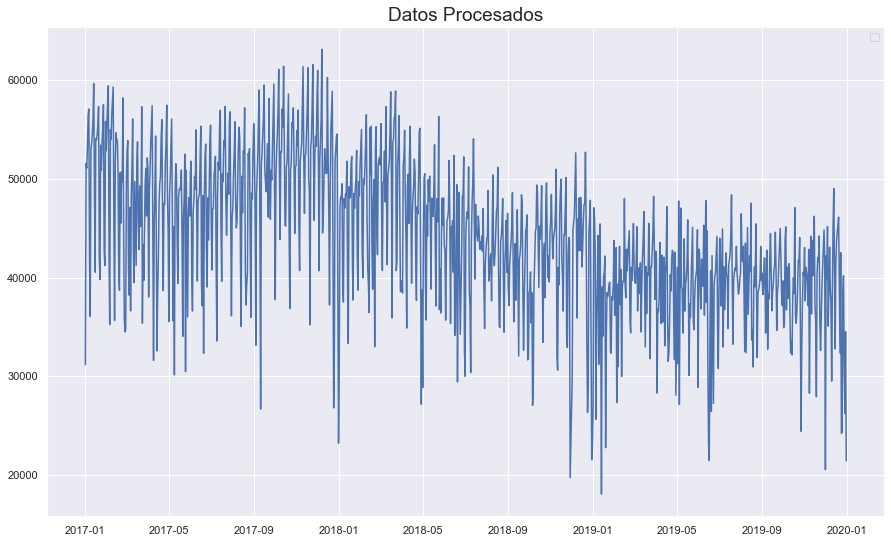

In [99]:
# Graficamos como quedo
plt.figure(figsize=(15,9))
plt.plot(prophet.ds,prophet.y)
plt.title("Datos Procesados",fontsize=19)
plt.legend()
plt.show()

<AxesSubplot:xlabel='y', ylabel='Density'>

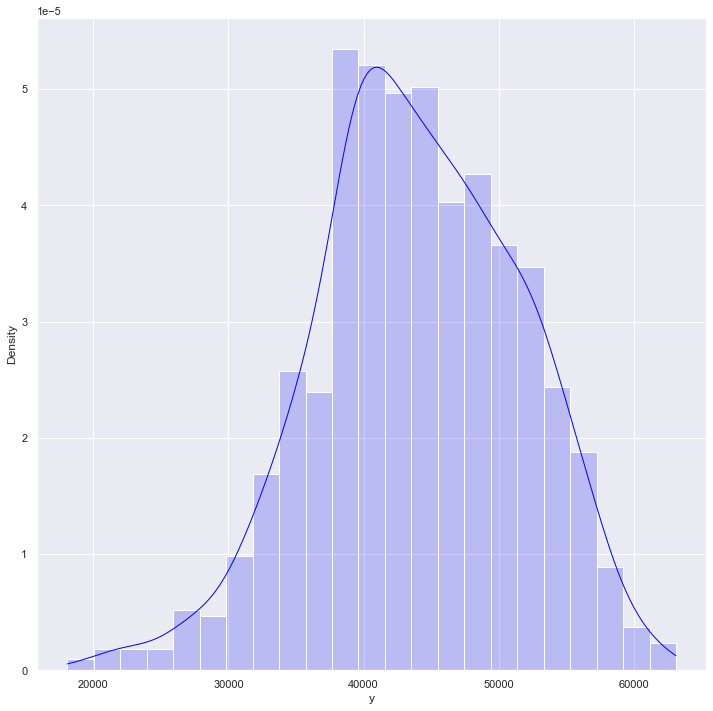

In [100]:
# Mometo de suavizar la serie a travez del metodo Box Cox. Antes vemos cual es su tipo de asimetría con el fin de colocar
# un valor lambda correcto para el boxcox.
sns.histplot(data = prophet.y, stat = "density",kde = True, line_kws= {"linewidth":1},color = "blue",alpha= 0.2)

1.3624215873009244

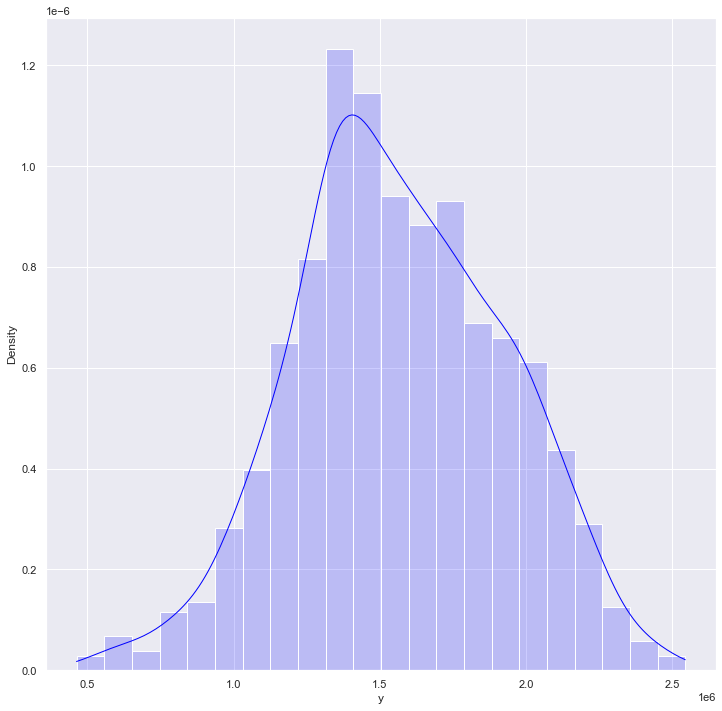

In [101]:
# Al colocar los parametros por defecto, el metodo boxcox busca un lambda que maximice la función de probabilidad 
# logarítmica, por lo que busca la mejor asimetría que se pueda conseguir. Ahora podemos asumir que los datos tienen una
# distribución normal.
prophet["y"],fit_lambda = boxcox(prophet.y)
sns.histplot(data = prophet.y, stat = "density",kde = True, line_kws= {"linewidth":1},color = "blue",alpha= 0.2)
fit_lambda

In [102]:
# Ahora imprimos como queda la nueva "y".
prophet

ds             y
0    2017-01-01  9.734170e+05
1    2017-01-02  1.931688e+06
2    2017-01-03  1.907487e+06
3    2017-01-04  2.022268e+06
4    2017-01-05  2.186931e+06
...         ...           ...
1084 2019-12-27  1.375055e+06
1085 2019-12-28  9.521295e+05
1086 2019-12-29  7.702081e+05
1087 2019-12-30  1.118163e+06
1088 2019-12-31  5.845683e+05

[1089 rows x 2 columns]

No handles with labels found to put in legend.


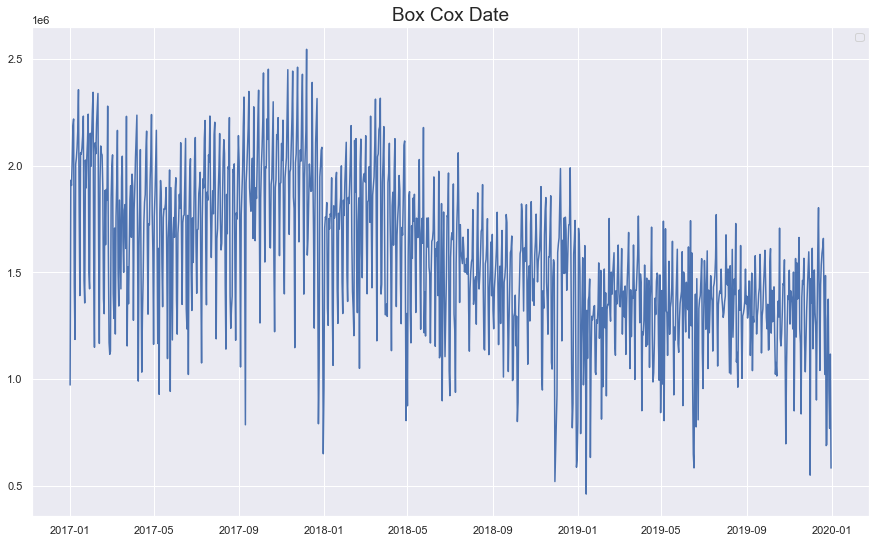

In [103]:
# Y graficamos también la nueva distribución de los datos.
plt.figure(figsize=(15,9))
plt.plot(prophet.ds,prophet.y)
plt.title("Box Cox Date",fontsize=19)
plt.legend()
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1080x648 with 0 Axes>

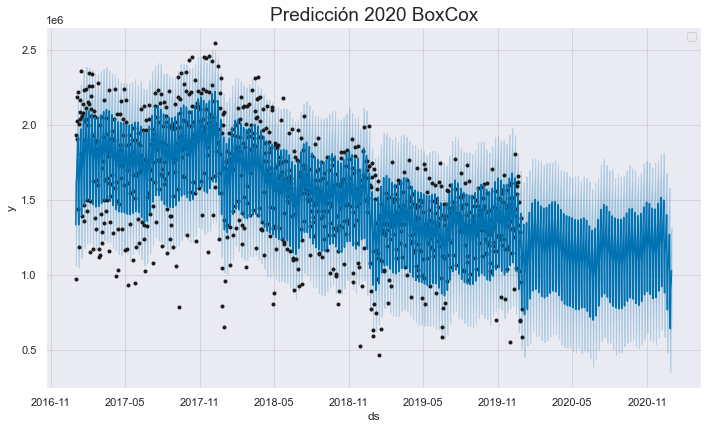

In [104]:
# Listo, una vez realizado la transformación de nuestros datos, estamos listos para predecir.
# En esta parte llamamos al modelo "model", y lo entrenamos con el "prophet" transformado.
model =  Prophet()
model.fit(prophet)

# Ahora debemos poner un rango de días para que prediga el 2020, en este caso 365 días. Luego entrenamos y predecimos para
# el año 2020.
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Finalmente graficamos.
plt.figure(figsize=(15,9))
fig = model.plot(forecast)
plt.title("Predicción 2020 BoxCox",fontsize=19)
plt.legend()
plt.show()

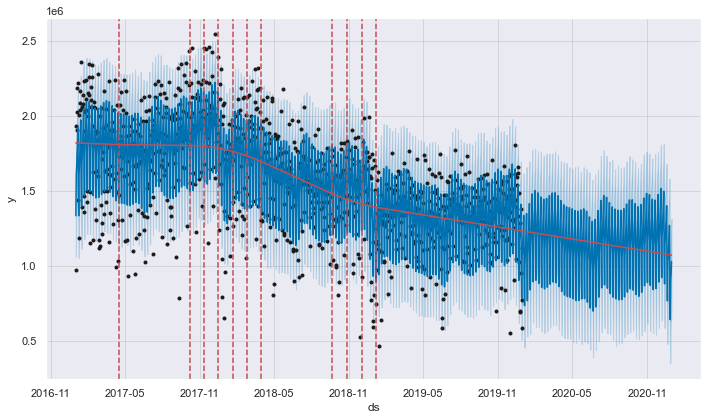

In [105]:
# Puntos de tendencia
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

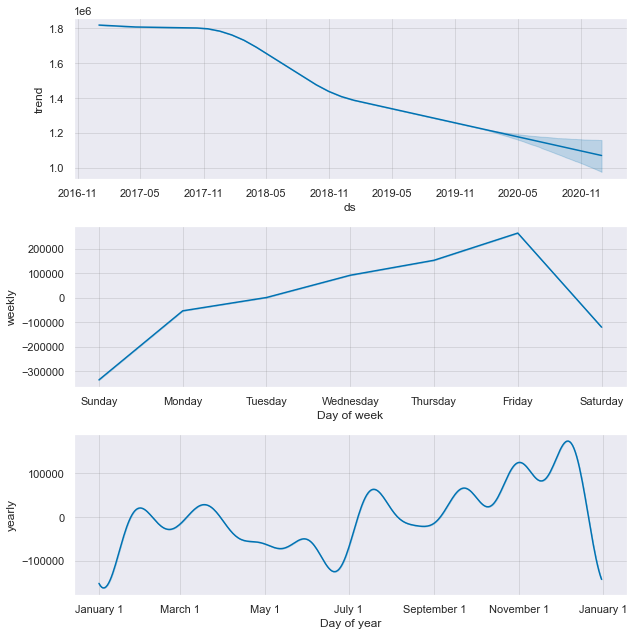

In [106]:
# Vamos a descomponer la serie prophet para chequear que predice para el 2020
b = model.plot_components(forecast)

## **Conclusiones**